***
## Table of Contents
<br>
<ol>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Uninfected:Infected Users</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. 70:30 Train Test Split </h3></a>
            </ul>
     </ol>
<br>

In [1]:
### Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
pd.set_option("display.max_columns",40)
warnings.filterwarnings("ignore")

from IPython.display import HTML


import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,binarize
from pandas_ml import ConfusionMatrix

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

Using TensorFlow backend.


In [2]:


### Function get_params takes as input a grid search model and prints out the best parameters for the model and 
### prints the best accuracy of the model
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

### The function takes as input the model, X and Y data to generate the confusion matrix  
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    display(cm)
    return cm
 
### The get accuracy plot takes as input a dataframe and a string for the title of the plot and displays a plot
### The function is primarily for plotting of accuracies for various classifiers for the same split.
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

### Function grid takes as input an estimator, X_train,Y_Train,X_test and Y_test and a string represetning the name of the model
### We perform StratifiedKFold cross validation and grid search to hypertune the parameters of the model     
def grid_acc(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=params,scoring='accuracy',cv=kfold,n_jobs=24)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    acc_train=accuracy_score(y,grid_search.predict(x))
    print("Accuracy of the ",model_name," model for the training data is:",acc_train)
    print("\nConfusion Matrix for Training data is:")
    cm_train=get_cm(grid_search,x,y)
    acc_test=accuracy_score(y_test,grid_search.predict(x_test))
    print("Accuracy of the ",model_name," model for test data is:",acc_test)
    print("\nConfusion Matrix for test data is:")
    cm_test=get_cm(grid_search,x_test,y_test)
    return grid_search,cm_train,cm_test,acc_train,acc_test    

### Plot roc curve
def get_roc_curve(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy on test data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

def get_roc_curve_deep_learning(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy of Logistic Model on training data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

#### Function models

In [3]:
def feat_impt_plot(feat_impt):    
    data = [go.Bar(x=columns,y=feat_impt,text=np.round(feat_impt,2),
            textposition = 'outside',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6
        )]
    layout = go.Layout(
    xaxis=dict(title='Features',
        tickfont=dict(
            size=12,
            color='black'
        )),
    yaxis=dict(title='Feature Importances'))
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [4]:
def KNN_model(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'K-Nearest Neighbors' + '\033[0m')
    knn=KNeighborsClassifier()
    parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
    knn_model,cm_train,cm_test,acc_train,acc_test=grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")
    cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)
    knn=KNeighborsClassifier(**knn_model.best_params_)
    knn.fit(X_train,Y_train)
    return knn,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [5]:
def Logistic_model(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Logistic Regression' + '\033[0m')
    logistic=LogisticRegression()
    parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial'])
    log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")
    cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)
    logistic=LogisticRegression(**log_model.best_params_)
    return logistic,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [6]:
def RandomForest(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'RandomForest Classifier' + '\033[0m')
    rf=RandomForestClassifier()
    parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
    rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")
    cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)
    rf=RandomForestClassifier(**rf_model.best_params_)
    rf.fit(X_train,Y_train)
    feat_impt_plot(rf.feature_importances_)
    return rf,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,rf.feature_importances_

In [7]:
def AdaBoost(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Adaoost Classifier' + '\033[0m')
    ada=AdaBoostClassifier()
    parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
    ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")
    cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)
    ada=AdaBoostClassifier(**ada_model.best_params_)
    ada.fit(X_train,Y_train)
    feat_impt_plot(ada.feature_importances_)
    return ada,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,ada.feature_importances_

In [8]:
def GradientBoosting(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'GradientBoosting Classifier' + '\033[0m')
    gbc=GradientBoostingClassifier()
    parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
    gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")
    cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)
    gbc_model=GradientBoostingClassifier(**gbc_model.best_params_)
    gbc_model.fit(X_train,Y_train)
    feat_impt_plot(gbc_model.feature_importances_)
    return gbc_model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,gbc_model.feature_importances_

In [9]:
def ExtraTree(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'ExtraTree Classifier' + '\033[0m')
    ext_tree=ExtraTreeClassifier()
    parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
    ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")
    cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)
    ext_tree_model=ExtraTreeClassifier(**ext_tree_model.best_params_)
    ext_tree_model.fit(X_train,Y_train)
    feat_impt_plot(ext_tree_model.feature_importances_)
    return ext_tree_model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,ext_tree_model.feature_importances_

In [10]:
def Bagging(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Bagging Classifier' + '\033[0m')
    bagging=BaggingClassifier()
    parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )
    bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")
    cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)
    bagging=BaggingClassifier(**bagging_model.best_params_)
    bagging.fit(X_train,Y_train)
    return bagging,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [11]:
# def Voting(models,X_train,Y_train,X_test,Y_test):
#     print('\033[1m' + 'Voting Classifier' + '\033[0m')
#     eclf = VotingClassifier(estimators=[models], voting='soft')
#     eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
#     acc_train=eclf.score(X_train,Y_train)
#     print("The training accuracy is :",acc_train)
#     pred=eclf.predict(X_test)
#     cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
#     acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
#     print("The test accuracy is:",acc_test)
#     cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
#     display(cm_test)
#     cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)
#     return cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [12]:
def DeepLearning1(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Neural Network-1' + '\033[0m')
    np.random.seed(0)
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)
    acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
    print("The accuracy of the model on training data is:",acc_train)
    cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
    cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
    display(cm_train)
    acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
    print("The accuracy of the model on test data is:",acc_test)
    display(cm_test)
    cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)
    return  deep_learning,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [13]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning

In [14]:
def DeepLearning2(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Neural Network-2' + '\033[0m')
    classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
    grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
    grid_search.fit(X_train,Y_train)
    acc_train=grid_search.score(X_train,Y_train)
    print("The accuracy of the model on training data is:",acc_train)
    cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
    display(cm_train)
    acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
    print("The accuracy of the model on test data is:",acc_test)
    cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
    display(cm_test)
    cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)
    return grid_search,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [15]:
columns=['SP','DP','NAPP','SIP','DIP','NREC','PAR','PAS','LEN','BYS', 'BYR', '00:00', '01:00', '02:00', '03:00', '04:00', '05:00',
       '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00',
       '22:00', '23:00']

ind_columns=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier',
                            'Neural Network-1','Neural-Network-2']

f=[KNN_model,Logistic_model,RandomForest,AdaBoost,GradientBoosting, ExtraTree,Bagging,DeepLearning1,DeepLearning2]

###  <a id='1.A' style="text-decoration : none; color : #000000;">A. 80:20 Train Test Split</a>

#### Random State 0

In [16]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_0.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cdfc7d1338dd60c6953,6855,69,70,102,1503,7494,182.050440,70.107419,109.414331,18672.453563,223011.614091,319,339,265,588,981,782,183,139,87,167,70,122,149,313,268,399,825,309,223,264,229,125,126,222
3c45372db59b842faec38488806b64c282270417f6755ba493e51eda8e98b402,13,4,4,3,8,13,97.769231,90.000000,88.461538,7757.153846,120738.153846,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,7,0,0,0,0,0,0,0


1 -> Infected
0 -> Uninfected


User
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cdfc7d1338dd60c6953    1
3c45372db59b842faec38488806b64c282270417f6755ba493e51eda8e98b402    0
653fe3e24024826e008a512560be7abb15b06bd46e89ba4159dbdc6b8b5983c3    0
8c8d63c29001941282625da51ded54c9305c2b2c5ed680ef803b61b1231a2107    1
ac87be58a25e50356ef8d66135f93392ac6c40f3c7b557e7c16f663ce168e9fc    1
Name: Target, dtype: int64

The train/test split ratio is 80:20


In [17]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,euclidean,50,uniform


Accuracy of the  KNN  model for the training data is: 0.8028350515463918

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1829   488     2317
True         430  1909     2339
__all__     2259  2397     4656

Accuracy of the  KNN  model for test data is: 0.8101374570446735

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        479   114      593
True         107   464      571
__all__      586   578     1164

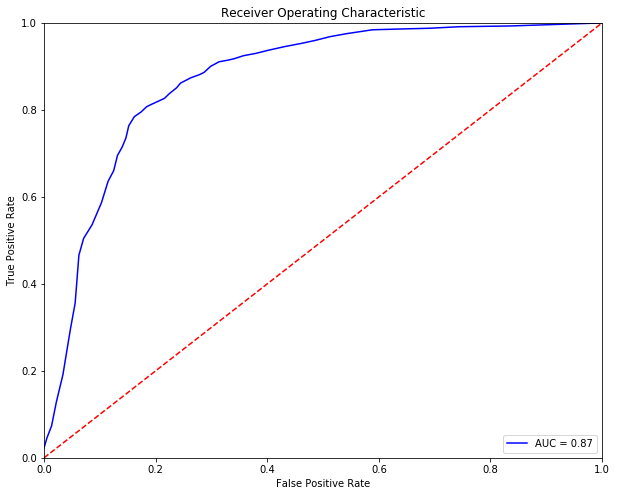

Optimal Threshold is 0.52
Accuracy on test data is: 0.8118556701030928


Predicted  False  True  __all__
Actual                         
False        484   109      593
True         110   461      571
__all__      594   570     1164



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.7,False,True,0.5,100,multinomial,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.7901632302405498

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1875   442     2317
True         535  1804     2339
__all__     2410  2246     4656

Accuracy of the  Logistic  model for test data is: 0.8067010309278351

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        494    99      593
True         126   445      571
__all__      620   544     1164

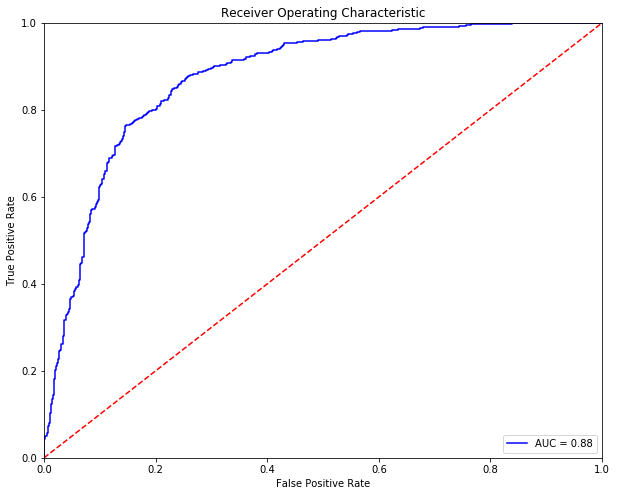

Optimal Threshold is 0.47704285890344916
Accuracy on test data is: 0.8006872852233677


Predicted  False  True  __all__
Actual                         
False        475   118      593
True         114   457      571
__all__      589   575     1164



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,300,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.7985395189003437

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1762   555     2317
True         383  1956     2339
__all__     2145  2511     4656

Accuracy of the  Random Forest Trees  model for test data is: 0.8127147766323024

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        465   128      593
True          90   481      571
__all__      555   609     1164

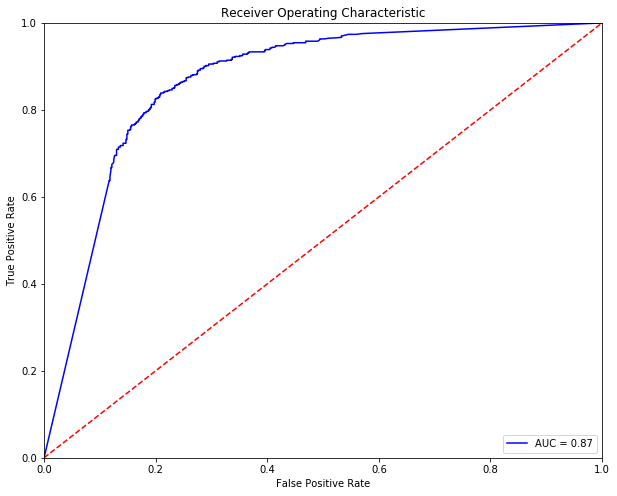

Optimal Threshold is 0.6367624693007194
Accuracy on test data is: 0.8075601374570447


Predicted  False  True  __all__
Actual                         
False        480   113      593
True         111   460      571
__all__      591   573     1164



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,1,400,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8039089347079038

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1754   563     2317
True         350  1989     2339
__all__     2104  2552     4656

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8041237113402062

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        449   144      593
True          84   487      571
__all__      533   631     1164

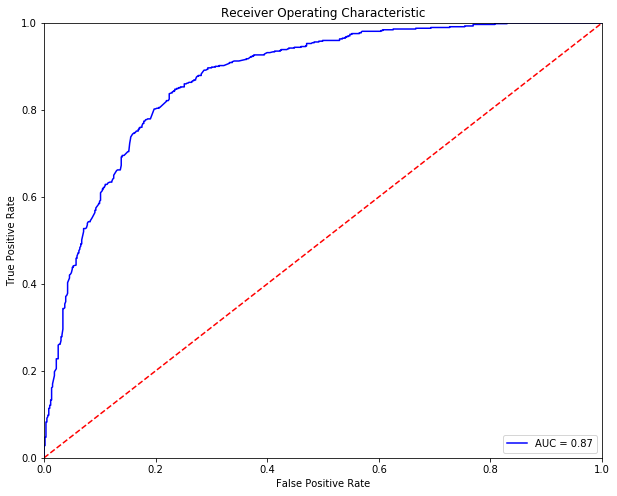

Optimal Threshold is 0.5096869446331997
Accuracy on test data is: 0.7946735395189003


Predicted  False  True  __all__
Actual                         
False        480   113      593
True         126   445      571
__all__      606   558     1164



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.05,exponential,10,0.1,150,0,0.5


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8127147766323024

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1770   547     2317
True         325  2014     2339
__all__     2095  2561     4656

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8015463917525774

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        448   145      593
True          86   485      571
__all__      534   630     1164

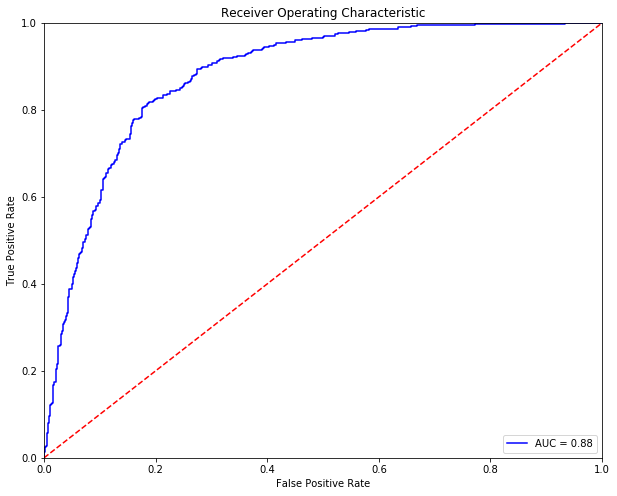

Optimal Threshold is 0.5868320309273528
Accuracy on test data is: 0.8144329896907216


Predicted  False  True  __all__
Actual                         
False        483   110      593
True         106   465      571
__all__      589   575     1164



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.7991838487972509

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1847   470     2317
True         465  1874     2339
__all__     2312  2344     4656

Accuracy of the  Extra Decision Tree  model for test data is: 0.8049828178694158

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        484   109      593
True         118   453      571
__all__      602   562     1164

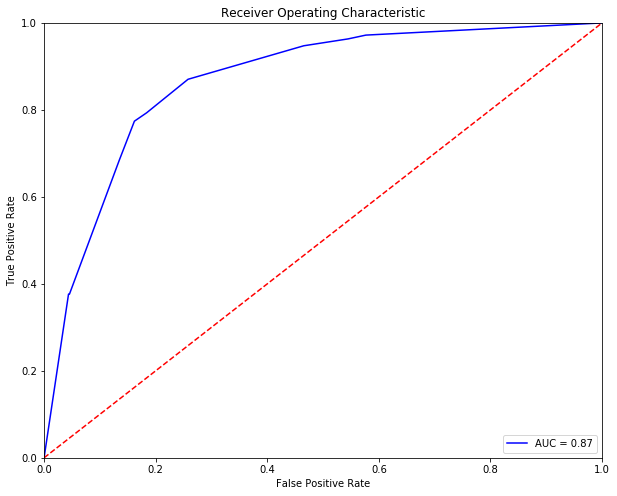

Optimal Threshold is 0.5588235294117647
Accuracy on test data is: 0.8067010309278351


Predicted  False  True  __all__
Actual                         
False        497    96      593
True         129   442      571
__all__      626   538     1164



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.2,0.6,200,True,0


Accuracy of the  Bagging  model for the training data is: 0.9884020618556701

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2287    30     2317
True          24  2315     2339
__all__     2311  2345     4656

Accuracy of the  Bagging  model for test data is: 0.8058419243986255

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        462   131      593
True          95   476      571
__all__      557   607     1164

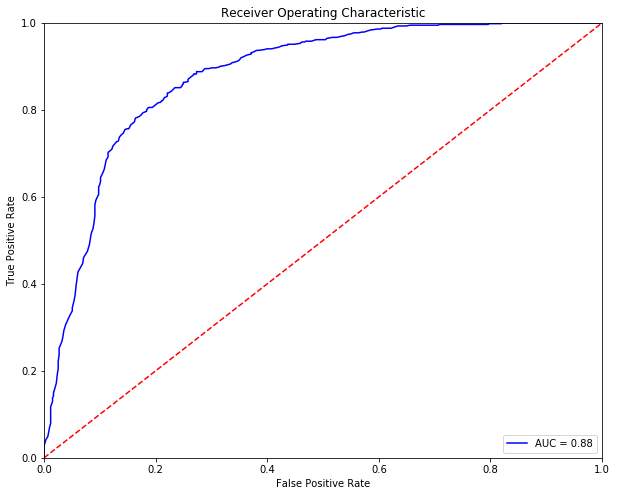

Optimal Threshold is 0.56
Accuracy on test data is: 0.8075601374570447


Predicted  False  True  __all__
Actual                         
False        480   113      593
True         111   460      571
__all__      591   573     1164



Neural Network-1
The accuracy of the model on training data is: 0.8780068728522337


Predicted  False  True  __all__
Actual                         
False       1907   410     2317
True         158  2181     2339
__all__     2065  2591     4656

The accuracy of the model on test data is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False        436   157      593
True          95   476      571
__all__      531   633     1164

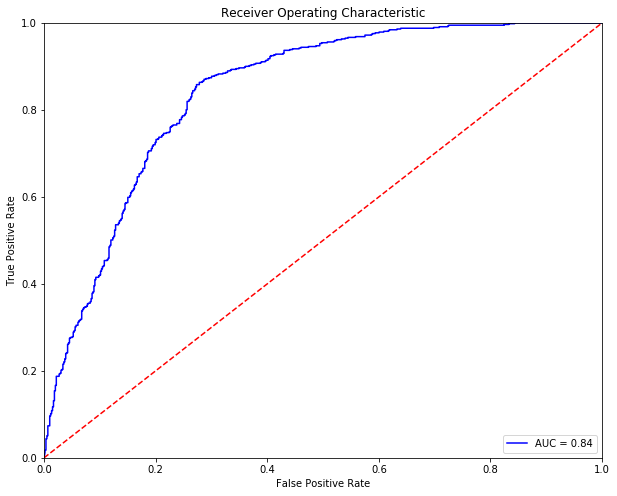

Optimal Threshold is 0.63906544
Accuracy of Logistic Model on training data is: 0.7646048109965635


Predicted  False  True  __all__
Actual                         
False        453   140      593
True         134   437      571
__all__      587   577     1164



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   53.6s finished


The accuracy of the model on training data is: 0.7935996563573883


Predicted  False  True  __all__
Actual                         
False       1783   534     2317
True         427  1912     2339
__all__     2210  2446     4656

The accuracy of the model on test data is: 0.8006872852233677


Predicted  False  True  __all__
Actual                         
False        461   132      593
True         100   471      571
__all__      561   603     1164

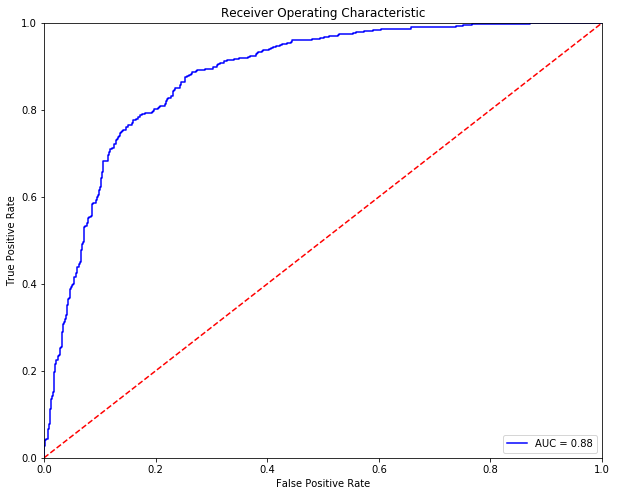

Optimal Threshold is 0.5555886
Accuracy on test data is: 0.8015463917525774


Predicted  False  True  __all__
Actual                         
False        476   117      593
True         114   457      571
__all__      590   574     1164

In [18]:
feat_imp=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_80_50_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_80_50_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_80_50_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [19]:
table_80_50_train['index']=ind_columns
table_80_50_test['index']=ind_columns
table_80_50_test_roc['index']=ind_columns

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)
table_80_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.802835,1909.0,1829.0,488.0,430.0,0.210617,0.183839
LogisticRegression,0.790163,1804.0,1875.0,442.0,535.0,0.190764,0.228730
RandomForestClassifier,0.798540,1956.0,1762.0,555.0,383.0,0.239534,0.163745
AdaBoostClassifier,0.803909,1989.0,1754.0,563.0,350.0,0.242987,0.149637
GradientBoostingClassifier,0.812715,2014.0,1770.0,547.0,325.0,0.236081,0.138948
ExtraTreeClassifier,0.799184,1874.0,1847.0,470.0,465.0,0.202849,0.198803
BaggingClassifier,0.988402,2315.0,2287.0,30.0,24.0,0.012948,0.010261
Neural Network-1,0.878007,2181.0,1907.0,410.0,158.0,0.176953,0.067550
Neural-Network-2,0.793600,1912.0,1783.0,534.0,427.0,0.230470,0.182557


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.810137,464.0,479.0,114.0,107.0,0.192243,0.187391
LogisticRegression,0.806701,445.0,494.0,99.0,126.0,0.166948,0.220665
RandomForestClassifier,0.812715,481.0,465.0,128.0,90.0,0.215852,0.157618
AdaBoostClassifier,0.804124,487.0,449.0,144.0,84.0,0.242833,0.147110
GradientBoostingClassifier,0.801546,485.0,448.0,145.0,86.0,0.244519,0.150613
ExtraTreeClassifier,0.804983,453.0,484.0,109.0,118.0,0.183811,0.206655
BaggingClassifier,0.805842,476.0,462.0,131.0,95.0,0.220911,0.166375
Neural Network-1,0.783505,476.0,436.0,157.0,95.0,0.264755,0.166375
Neural-Network-2,0.800687,471.0,461.0,132.0,100.0,0.222597,0.175131


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.811856,461.0,484.0,109.0,110.0,0.183811,0.192644,0.520000,0.872667
LogisticRegression,0.800687,457.0,475.0,118.0,114.0,0.198988,0.199650,0.477043,0.877396
RandomForestClassifier,0.807560,460.0,480.0,113.0,111.0,0.190556,0.194396,0.636762,0.866667
AdaBoostClassifier,0.794674,445.0,480.0,113.0,126.0,0.190556,0.220665,0.509687,0.874753
GradientBoostingClassifier,0.814433,465.0,483.0,110.0,106.0,0.185497,0.185639,0.586832,0.880347
ExtraTreeClassifier,0.806701,442.0,497.0,96.0,129.0,0.161889,0.225919,0.558824,0.867495
BaggingClassifier,0.807560,460.0,480.0,113.0,111.0,0.190556,0.194396,0.560000,0.878099
Neural Network-1,0.764605,437.0,453.0,140.0,134.0,0.236088,0.234676,0.639065,0.841852
Neural-Network-2,0.801546,457.0,476.0,117.0,114.0,0.197302,0.199650,0.555589,0.880367


#### Random State 10

In [20]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_10.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847,4555,135,61,234,1180,5030,132.304771,73.091252,117.687475,16211.290656,162537.369185,505,537,405,191,123,63,55,31,60,58,68,140,306,137,125,191,109,234,264,244,361,205,399,219
910f8814c078483a86a1030fa3fce449aaeafd169b144fb3131f4c1577252cc3,9874,59,59,112,2319,11943,72.815373,68.967847,53.259315,33132.043708,73635.531525,226,124,250,322,544,1307,803,855,806,600,729,512,249,247,321,471,643,417,561,406,539,466,373,172


1 -> Infected
0 -> Uninfected


User
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847    1
910f8814c078483a86a1030fa3fce449aaeafd169b144fb3131f4c1577252cc3    1
117f95f1e1e2f68a2fcbb99523c4d6b2cd4307a559b566c799ea644cefadcf3b    0
4d648f5609b96f24133ff4ca6473d1bc6ae1e4d8723701c182c856b3eb4abebb    1
d225251f106c00909acb89ddc8766a8221b31e5d48cf3cd0d1dbbb877c47e30a    1
Name: Target, dtype: int64

The train/test split ratio is 80:20


In [21]:
## Table to store training and test measures
table_80_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,30,uniform


Accuracy of the  KNN  model for the training data is: 0.8047680412371134

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1800   502     2302
True         407  1947     2354
__all__     2207  2449     4656

Accuracy of the  KNN  model for test data is: 0.7955326460481099

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        474   134      608
True         104   452      556
__all__      578   586     1164

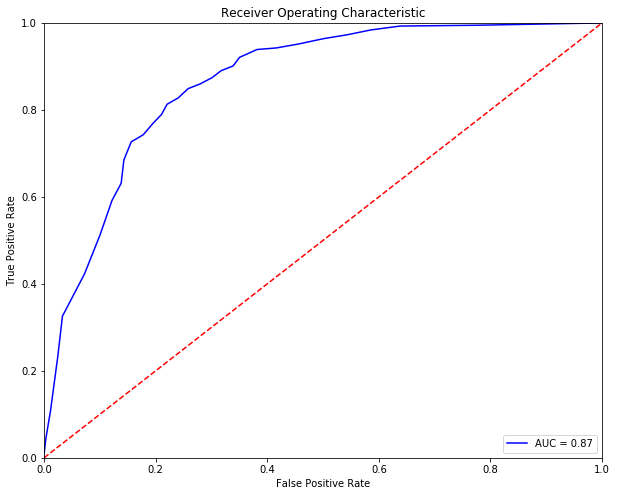

Optimal Threshold is 0.5666666666666667
Accuracy on test data is: 0.7878006872852233


Predicted  False  True  __all__
Actual                         
False        489   119      608
True         128   428      556
__all__      617   547     1164



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.3,False,True,0.5,100,multinomial,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.7966065292096219

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1868   434     2302
True         513  1841     2354
__all__     2381  2275     4656

Accuracy of the  Logistic  model for test data is: 0.7860824742268041

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        493   115      608
True         134   422      556
__all__      627   537     1164

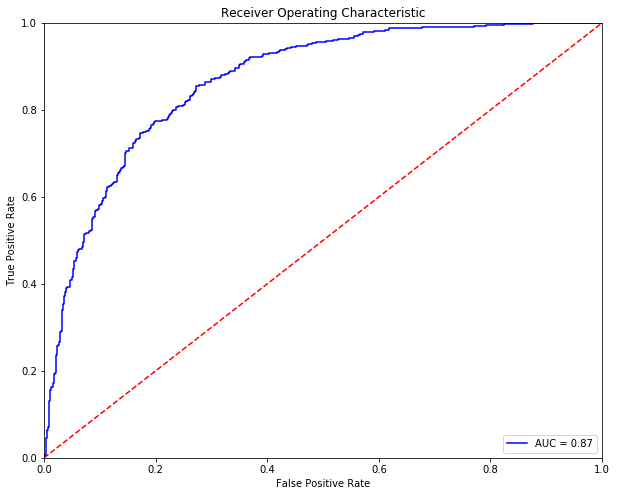

Optimal Threshold is 0.48010814217679876
Accuracy on test data is: 0.7792096219931272


Predicted  False  True  __all__
Actual                         
False        474   134      608
True         123   433      556
__all__      597   567     1164



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,300,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.8051975945017182

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1766   536     2302
True         371  1983     2354
__all__     2137  2519     4656

Accuracy of the  Random Forest Trees  model for test data is: 0.7895189003436426

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        461   147      608
True          98   458      556
__all__      559   605     1164

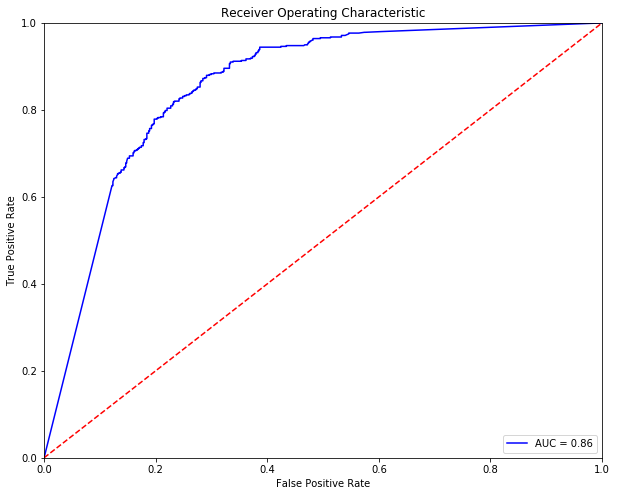

Optimal Threshold is 0.637567969205604
Accuracy on test data is: 0.7860824742268041


Predicted  False  True  __all__
Actual                         
False        479   129      608
True         120   436      556
__all__      599   565     1164



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME.R,0.5,50,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.804553264604811

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1717   585     2302
True         325  2029     2354
__all__     2042  2614     4656

Accuracy of the  AdaBoostClassifier  model for test data is: 0.7852233676975945

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        446   162      608
True          88   468      556
__all__      534   630     1164

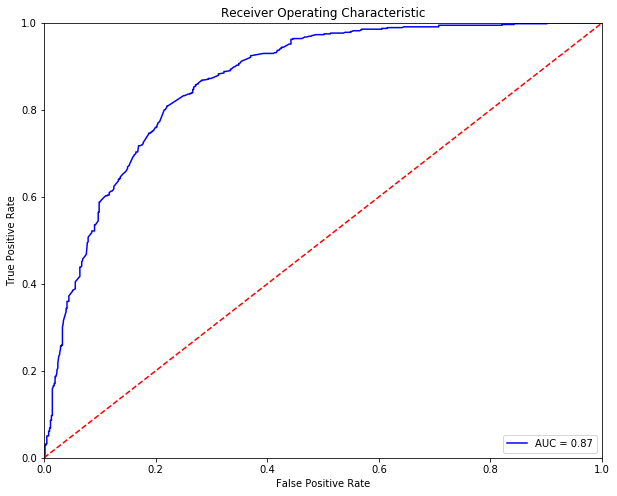

Optimal Threshold is 0.5043872704507296
Accuracy on test data is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False        482   126      608
True         126   430      556
__all__      608   556     1164



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.1,exponential,15,0.3,50,0,0.7


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8067010309278351

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1753   549     2302
True         351  2003     2354
__all__     2104  2552     4656

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.7920962199312714

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        451   157      608
True          85   471      556
__all__      536   628     1164

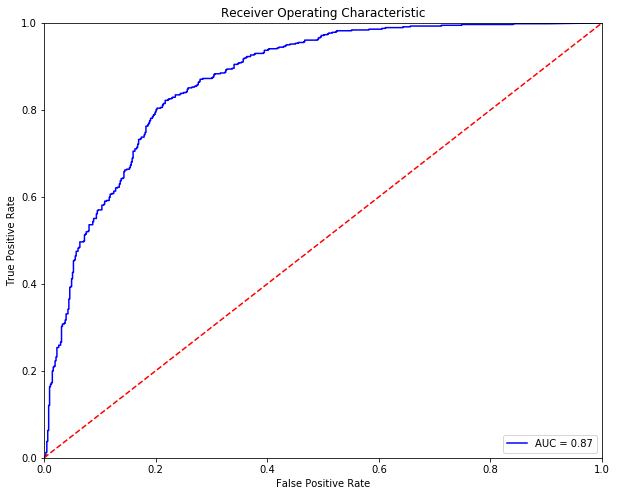

Optimal Threshold is 0.5954851332016018
Accuracy on test data is: 0.7989690721649485


Predicted  False  True  __all__
Actual                         
False        486   122      608
True         112   444      556
__all__      598   566     1164



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.1,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8006872852233677

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1747   555     2302
True         373  1981     2354
__all__     2120  2536     4656

Accuracy of the  Extra Decision Tree  model for test data is: 0.7895189003436426

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        458   150      608
True          95   461      556
__all__      553   611     1164

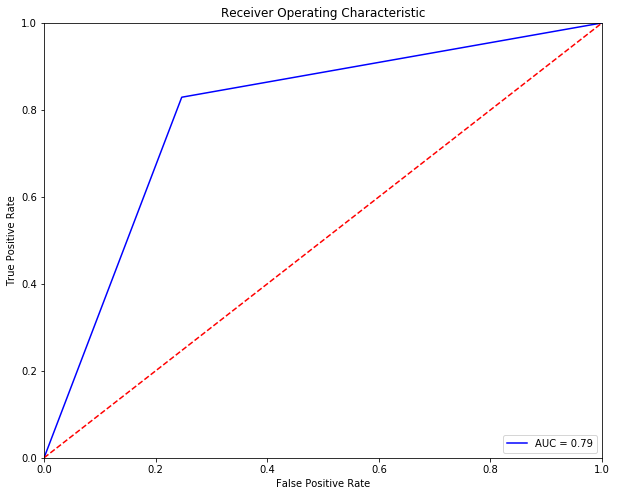

Optimal Threshold is 0.7811514195583596
Accuracy on test data is: 0.5223367697594502


Predicted   0.0  1.0  __all__
Actual                       
0.0         608    0      608
1.0         556    0      556
__all__    1164    0     1164

608
0
0
608
556
0
0
556
1.0
0.0
0.0
1.0


Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.2,0.3,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.8911082474226805

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1966   336     2302
True         171  2183     2354
__all__     2137  2519     4656

Accuracy of the  Bagging  model for test data is: 0.7955326460481099

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        466   142      608
True          96   460      556
__all__      562   602     1164

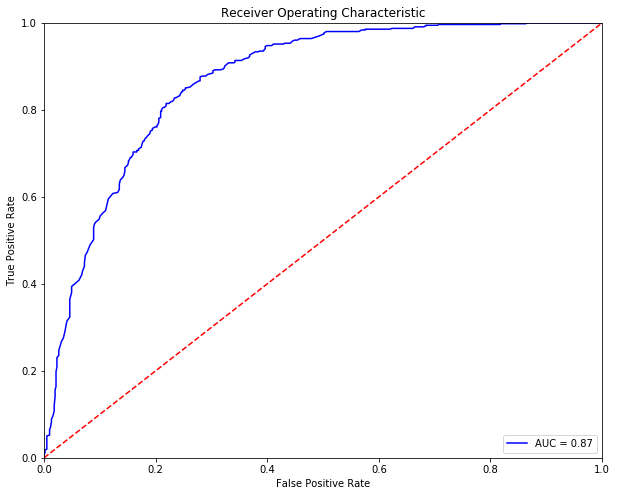

Optimal Threshold is 0.5633333333333334
Accuracy on test data is: 0.7895189003436426


Predicted  False  True  __all__
Actual                         
False        481   127      608
True         118   438      556
__all__      599   565     1164



Neural Network-1
The accuracy of the model on training data is: 0.8838058419243986


Predicted  False  True  __all__
Actual                         
False       2114   188     2302
True         353  2001     2354
__all__     2467  2189     4656

The accuracy of the model on test data is: 0.7585910652920962


Predicted  False  True  __all__
Actual                         
False        484   124      608
True         157   399      556
__all__      641   523     1164

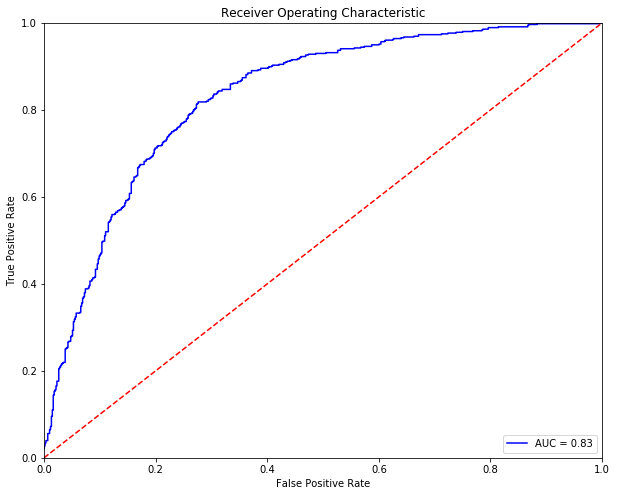

Optimal Threshold is 0.4093555
Accuracy of Logistic Model on training data is: 0.7603092783505154


Predicted  False  True  __all__
Actual                         
False        463   145      608
True         134   422      556
__all__      597   567     1164



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.5min finished


The accuracy of the model on training data is: 0.8028350515463918


Predicted  False  True  __all__
Actual                         
False       1754   548     2302
True         370  1984     2354
__all__     2124  2532     4656

The accuracy of the model on test data is: 0.7800687285223368


Predicted  False  True  __all__
Actual                         
False        448   160      608
True          96   460      556
__all__      544   620     1164

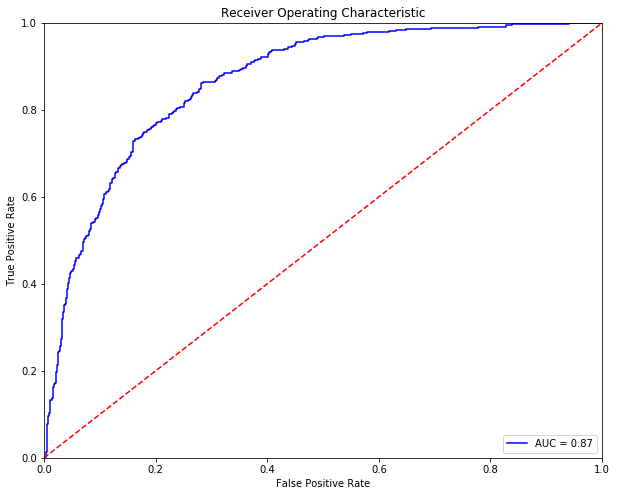

Optimal Threshold is 0.65770763
Accuracy on test data is: 0.7800687285223368


Predicted  False  True  __all__
Actual                         
False        475   133      608
True         123   433      556
__all__      598   566     1164

In [22]:
feat_imp_10=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_10[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_80_50_10_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_80_50_10_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_80_50_10_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [23]:
table_80_50_10_train['index']=ind_columns
table_80_50_10_test['index']=ind_columns
table_80_50_10_test_roc['index']=ind_columns
table_80_50_10_test.set_index(['index'],drop=True,inplace=True)
table_80_50_10_train.set_index(['index'],drop=True,inplace=True)
table_80_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_10_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_10_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.804768,1947.0,1800.0,502.0,407.0,0.218071,0.172897
LogisticRegression,0.796607,1841.0,1868.0,434.0,513.0,0.188532,0.217927
RandomForestClassifier,0.805198,1983.0,1766.0,536.0,371.0,0.232841,0.157604
AdaBoostClassifier,0.804553,2029.0,1717.0,585.0,325.0,0.254127,0.138063
GradientBoostingClassifier,0.806701,2003.0,1753.0,549.0,351.0,0.238488,0.149108
ExtraTreeClassifier,0.800687,1981.0,1747.0,555.0,373.0,0.241095,0.158454
BaggingClassifier,0.891108,2183.0,1966.0,336.0,171.0,0.145960,0.072642
Neural Network-1,0.883806,2001.0,2114.0,188.0,353.0,0.081668,0.149958
Neural-Network-2,0.802835,1984.0,1754.0,548.0,370.0,0.238054,0.157179


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.795533,452.0,474.0,134.0,104.0,0.220395,0.187050
LogisticRegression,0.786082,422.0,493.0,115.0,134.0,0.189145,0.241007
RandomForestClassifier,0.789519,458.0,461.0,147.0,98.0,0.241776,0.176259
AdaBoostClassifier,0.785223,468.0,446.0,162.0,88.0,0.266447,0.158273
GradientBoostingClassifier,0.792096,471.0,451.0,157.0,85.0,0.258224,0.152878
ExtraTreeClassifier,0.789519,461.0,458.0,150.0,95.0,0.246711,0.170863
BaggingClassifier,0.795533,460.0,466.0,142.0,96.0,0.233553,0.172662
Neural Network-1,0.758591,399.0,484.0,124.0,157.0,0.203947,0.282374
Neural-Network-2,0.780069,460.0,448.0,160.0,96.0,0.263158,0.172662


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.787801,428.000000,489.000000,119.000000,128.000000,0.195724,0.230216,0.566667,0.865729
LogisticRegression,0.779210,433.000000,474.000000,134.000000,123.000000,0.220395,0.221223,0.480108,0.867223
RandomForestClassifier,0.786082,436.000000,479.000000,129.000000,120.000000,0.212171,0.215827,0.637568,0.855473
AdaBoostClassifier,0.783505,430.000000,482.000000,126.000000,126.000000,0.207237,0.226619,0.504387,0.866717
GradientBoostingClassifier,0.798969,444.000000,486.000000,122.000000,112.000000,0.200658,0.201439,0.595485,0.870894
ExtraTreeClassifier,0.522337,317.580756,290.419244,290.419244,265.580756,0.522337,0.477663,0.781151,0.791213
BaggingClassifier,0.789519,438.000000,481.000000,127.000000,118.000000,0.208882,0.212230,0.563333,0.867344
Neural Network-1,0.760309,422.000000,463.000000,145.000000,134.000000,0.238487,0.241007,0.409355,0.830910
Neural-Network-2,0.780069,433.000000,475.000000,133.000000,123.000000,0.218750,0.221223,0.657708,0.865555


#### Random State 20

In [24]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_20.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

## Table to store training and test measures
table_80_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec429a3f1a997c5ba98,994,23,34,106,305,1011,280.252226,164.641939,83.002967,13987.476756,359758.589515,0,0,0,0,0,0,0,0,1,2,58,80,103,68,62,111,155,226,100,12,15,6,8,4
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9e976b79fa3511fa48,38,6,6,6,15,38,12.368421,10.394737,48.078947,1728.315789,9966.815789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,15,13,0,0,0,0,0,0,0


1 -> Infected
0 -> Uninfected


User
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec429a3f1a997c5ba98    0
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9e976b79fa3511fa48    0
a70d401cfd6804c5711ae7620658b6be8b25483f999cb8bf73e44e011f877dd9    1
22730c54b8e7377fdfa932bf6b6c14741966f73ac8cc7d945fae9264c808afbb    0
47d304146c958a1134c7c928152e25972e4b8e660576183ae7dbca7d7db049db    1
Name: Target, dtype: int64

The train/test split ratio is 80:20


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,30,uniform


Accuracy of the  KNN  model for the training data is: 0.8011168384879725

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1860   497     2357
True         429  1870     2299
__all__     2289  2367     4656

Accuracy of the  KNN  model for test data is: 0.8067010309278351

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        448   105      553
True         120   491      611
__all__      568   596     1164

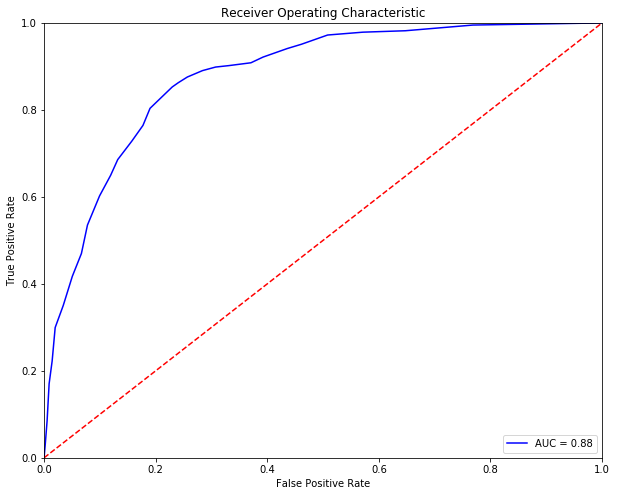

Optimal Threshold is 0.5333333333333333
Accuracy on test data is: 0.7920962199312714


Predicted  False  True  __all__
Actual                         
False        455    98      553
True         144   467      611
__all__      599   565     1164



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.3,False,True,0.5,100,multinomial,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.7858676975945017

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1904   453     2357
True         544  1755     2299
__all__     2448  2208     4656

Accuracy of the  Logistic  model for test data is: 0.7998281786941581

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        462    91      553
True         142   469      611
__all__      604   560     1164

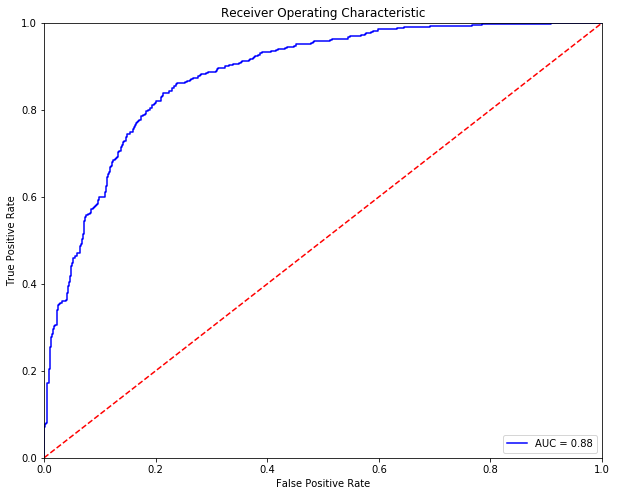

Optimal Threshold is 0.46927612553468784
Accuracy on test data is: 0.8067010309278351


Predicted  False  True  __all__
Actual                         
False        447   106      553
True         119   492      611
__all__      566   598     1164



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,200,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.7981099656357389

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1797   560     2357
True         380  1919     2299
__all__     2177  2479     4656

Accuracy of the  Random Forest Trees  model for test data is: 0.813573883161512

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        443   110      553
True         107   504      611
__all__      550   614     1164

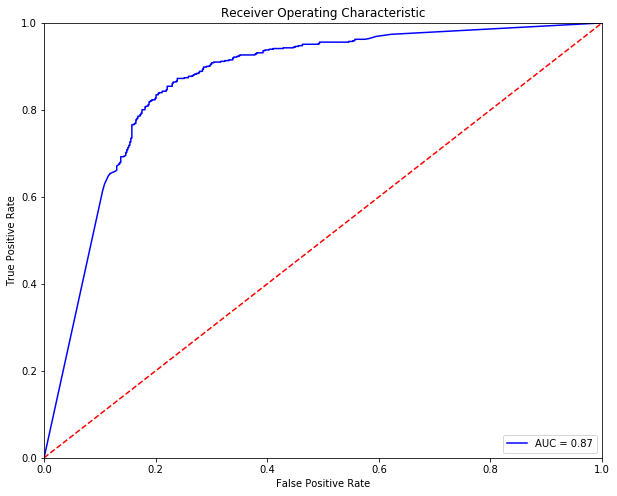

Optimal Threshold is 0.5411195605659256
Accuracy on test data is: 0.8127147766323024


Predicted  False  True  __all__
Actual                         
False        450   103      553
True         115   496      611
__all__      565   599     1164



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,1.5,50,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8021907216494846

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1789   568     2357
True         353  1946     2299
__all__     2142  2514     4656

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8195876288659794

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        443   110      553
True         100   511      611
__all__      543   621     1164

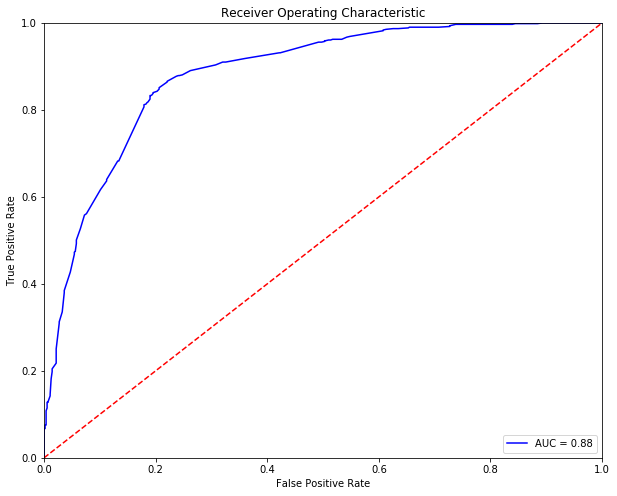

Optimal Threshold is 0.5036163227993056
Accuracy on test data is: 0.8152920962199313


Predicted  False  True  __all__
Actual                         
False        452   101      553
True         114   497      611
__all__      566   598     1164



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.05,deviance,5,0.1,100,0,0.5


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8142182130584192

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1825   532     2357
True         333  1966     2299
__all__     2158  2498     4656

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.813573883161512

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        437   116      553
True         101   510      611
__all__      538   626     1164

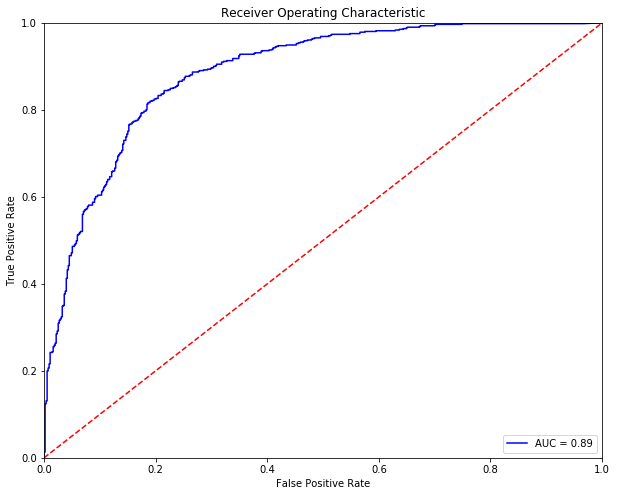

Optimal Threshold is 0.5510091348584801
Accuracy on test data is: 0.8144329896907216


Predicted  False  True  __all__
Actual                         
False        451   102      553
True         114   497      611
__all__      565   599     1164



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.1,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.7957474226804123

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1770   587     2357
True         364  1935     2299
__all__     2134  2522     4656

Accuracy of the  Extra Decision Tree  model for test data is: 0.802405498281787

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        429   124      553
True         106   505      611
__all__      535   629     1164

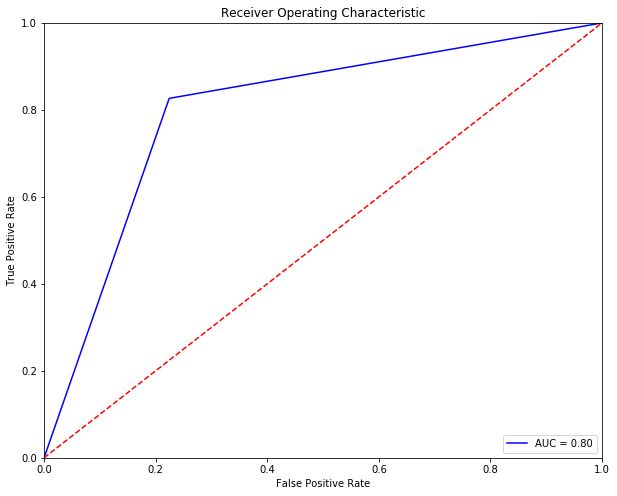

Optimal Threshold is 0.767248215701824
Accuracy on test data is: 0.47508591065292094


Predicted   0.0  1.0  __all__
Actual                       
0.0         553    0      553
1.0         611    0      611
__all__    1164    0     1164

553
0
0
553
611
0
0
611
1.0
0.0
0.0
1.0


Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.4,0.3,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.8969072164948454

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2044   313     2357
True         167  2132     2299
__all__     2211  2445     4656

Accuracy of the  Bagging  model for test data is: 0.8152920962199313

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        435   118      553
True          97   514      611
__all__      532   632     1164

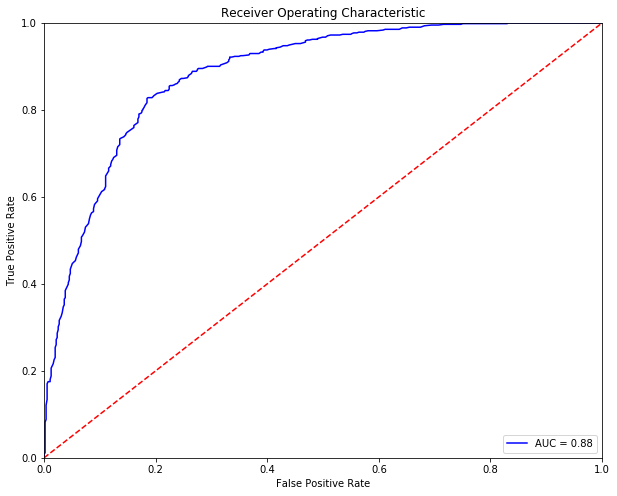

Optimal Threshold is 0.5433333333333333
Accuracy on test data is: 0.8152920962199313


Predicted  False  True  __all__
Actual                         
False        452   101      553
True         114   497      611
__all__      566   598     1164



Neural Network-1
The accuracy of the model on training data is: 0.8823024054982818


Predicted  False  True  __all__
Actual                         
False       2052   305     2357
True         243  2056     2299
__all__     2295  2361     4656

The accuracy of the model on test data is: 0.7491408934707904


Predicted  False  True  __all__
Actual                         
False        404   149      553
True         143   468      611
__all__      547   617     1164

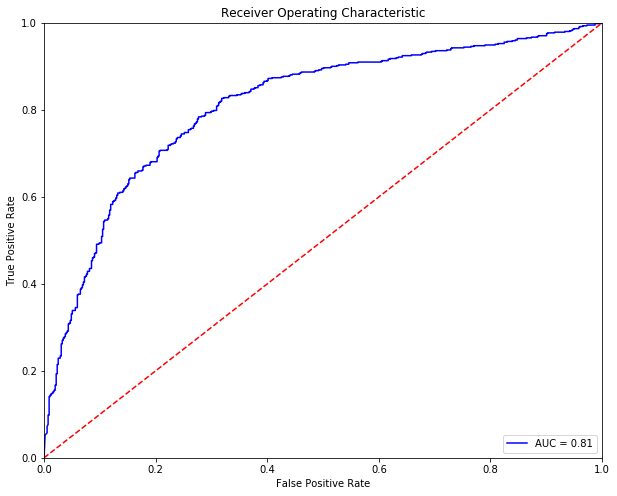

Optimal Threshold is 0.53015155
Accuracy of Logistic Model on training data is: 0.7474226804123711


Predicted  False  True  __all__
Actual                         
False        414   139      553
True         155   456      611
__all__      569   595     1164



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.1min finished


The accuracy of the model on training data is: 0.7916666666666666


Predicted  False  True  __all__
Actual                         
False       1654   703     2357
True         267  2032     2299
__all__     1921  2735     4656

The accuracy of the model on test data is: 0.8015463917525774


Predicted  False  True  __all__
Actual                         
False        399   154      553
True          77   534      611
__all__      476   688     1164

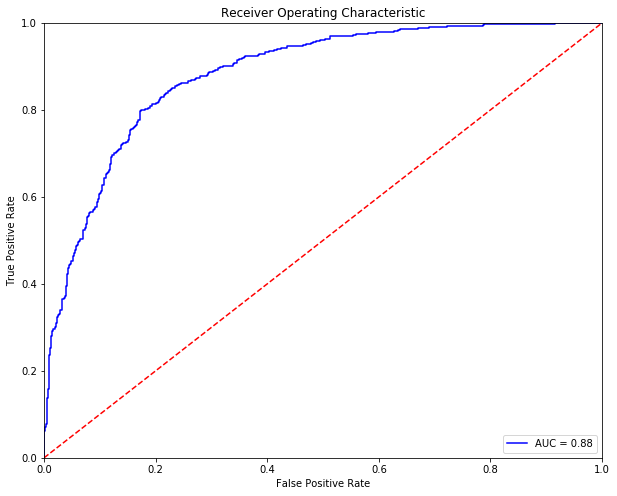

Optimal Threshold is 0.6508582
Accuracy on test data is: 0.8084192439862543


Predicted  False  True  __all__
Actual                         
False        448   105      553
True         118   493      611
__all__      566   598     1164

In [25]:
feat_imp_20=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_20[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_80_50_20_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_80_50_20_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_80_50_20_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [26]:
table_80_50_20_train['index']=ind_columns
table_80_50_20_test['index']=ind_columns
table_80_50_20_test_roc['index']=ind_columns
table_80_50_20_test.set_index(['index'],drop=True,inplace=True)
table_80_50_20_train.set_index(['index'],drop=True,inplace=True)
table_80_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_20_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.801117,1870.0,1860.0,497.0,429.0,0.210861,0.186603
LogisticRegression,0.785868,1755.0,1904.0,453.0,544.0,0.192193,0.236625
RandomForestClassifier,0.798110,1919.0,1797.0,560.0,380.0,0.237590,0.165289
AdaBoostClassifier,0.802191,1946.0,1789.0,568.0,353.0,0.240984,0.153545
GradientBoostingClassifier,0.814218,1966.0,1825.0,532.0,333.0,0.225711,0.144846
ExtraTreeClassifier,0.795747,1935.0,1770.0,587.0,364.0,0.249045,0.158330
BaggingClassifier,0.896907,2132.0,2044.0,313.0,167.0,0.132796,0.072640
Neural Network-1,0.882302,2056.0,2052.0,305.0,243.0,0.129402,0.105698
Neural-Network-2,0.791667,2032.0,1654.0,703.0,267.0,0.298261,0.116137


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.806701,491.0,448.0,105.0,120.0,0.189873,0.196399
LogisticRegression,0.799828,469.0,462.0,91.0,142.0,0.164557,0.232406
RandomForestClassifier,0.813574,504.0,443.0,110.0,107.0,0.198915,0.175123
AdaBoostClassifier,0.819588,511.0,443.0,110.0,100.0,0.198915,0.163666
GradientBoostingClassifier,0.813574,510.0,437.0,116.0,101.0,0.209765,0.165303
ExtraTreeClassifier,0.802405,505.0,429.0,124.0,106.0,0.224231,0.173486
BaggingClassifier,0.815292,514.0,435.0,118.0,97.0,0.213382,0.158756
Neural Network-1,0.749141,468.0,404.0,149.0,143.0,0.269439,0.234043
Neural-Network-2,0.801546,534.0,399.0,154.0,77.0,0.278481,0.126023


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.792096,467.000000,455.000000,98.000000,144.000000,0.177215,0.235679,0.533333,0.877527
LogisticRegression,0.806701,492.000000,447.000000,106.000000,119.000000,0.191682,0.194763,0.469276,0.880568
RandomForestClassifier,0.812715,496.000000,450.000000,103.000000,115.000000,0.186257,0.188216,0.541120,0.865760
AdaBoostClassifier,0.815292,497.000000,452.000000,101.000000,114.000000,0.182640,0.186579,0.503616,0.882666
GradientBoostingClassifier,0.814433,497.000000,451.000000,102.000000,114.000000,0.184448,0.186579,0.551009,0.885329
ExtraTreeClassifier,0.475086,262.722509,290.277491,290.277491,320.722509,0.475086,0.524914,0.767248,0.801141
BaggingClassifier,0.815292,497.000000,452.000000,101.000000,114.000000,0.182640,0.186579,0.543333,0.884645
Neural Network-1,0.747423,456.000000,414.000000,139.000000,155.000000,0.251356,0.253682,0.530152,0.810880
Neural-Network-2,0.808419,493.000000,448.000000,105.000000,118.000000,0.189873,0.193126,0.650858,0.881571


In [27]:
table_80_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

table_80_50_train_avg['accuracy']=(table_80_50_train['accuracy']+table_80_50_10_train['accuracy']+table_80_50_20_train['accuracy'])/3.0
table_80_50_train_avg['FPR']=(table_80_50_train['FPR']+table_80_50_10_train['FPR']+table_80_50_20_train['FPR'])/3.0
table_80_50_train_avg['FNR']=(table_80_50_train['FNR']+table_80_50_10_train['FNR']+table_80_50_20_train['FNR'])/3.0

table_80_50_test_avg['accuracy']=(table_80_50_test['accuracy']+table_80_50_10_test['accuracy']+table_80_50_20_test['accuracy'])/3.0
table_80_50_test_avg['FPR']=(table_80_50_test['FPR']+table_80_50_10_test['FPR']+table_80_50_20_test['FPR'])/3.0
table_80_50_test_avg['FNR']=(table_80_50_test['FNR']+table_80_50_10_test['FNR']+table_80_50_20_test['FNR'])/3.0

table_80_50_test_roc_avg['accuracy']=(table_80_50_test_roc['accuracy']+table_80_50_10_test_roc['accuracy']+table_80_50_20_test_roc['accuracy'])/3.0
table_80_50_test_roc_avg['FPR']=(table_80_50_test_roc['FPR']+table_80_50_10_test_roc['FPR']+table_80_50_20_test_roc['FPR'])/3.0
table_80_50_test_roc_avg['FNR']=(table_80_50_test_roc['FNR']+table_80_50_10_test_roc['FNR']+table_80_50_20_test_roc['FNR'])/3.0
table_80_50_test_roc_avg['auc']=(table_80_50_test_roc['auc']+table_80_50_10_test_roc['auc']+table_80_50_20_test_roc['auc'])/3.0


print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_80_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc_avg)


feat_imp_80_50=list(map(sum, zip(feat_imp,feat_imp_10,feat_imp_20)))
print("Average feature imortance for the 3 random sets:")
feat_impt_plot(sum(feat_imp_80_50)/12)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,0.802907,0.213183,0.181113
LogisticRegression,0.790879,0.190496,0.227761
RandomForestClassifier,0.800616,0.236655,0.162213
AdaBoostClassifier,0.803551,0.246033,0.147081
GradientBoostingClassifier,0.811211,0.233427,0.144301
ExtraTreeClassifier,0.798540,0.230996,0.171862
BaggingClassifier,0.925473,0.097235,0.051848
Neural Network-1,0.881372,0.129341,0.107735
Neural-Network-2,0.796034,0.255595,0.151958


Comparision Table for Test Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,0.804124,0.200837,0.190280
LogisticRegression,0.797537,0.173550,0.231360
RandomForestClassifier,0.805269,0.218848,0.169667
AdaBoostClassifier,0.802978,0.236065,0.156350
GradientBoostingClassifier,0.802405,0.237503,0.156264
ExtraTreeClassifier,0.798969,0.218251,0.183668
BaggingClassifier,0.805556,0.222615,0.165931
Neural Network-1,0.763746,0.246047,0.227597
Neural-Network-2,0.794101,0.254745,0.157939


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,FPR,FNR,auc
index,,,,
KNeighborsClassifier,0.797251,0.185583,0.219513,0.871974
LogisticRegression,0.795533,0.203688,0.205212,0.875062
RandomForestClassifier,0.802119,0.196328,0.199480,0.862633
AdaBoostClassifier,0.797824,0.193478,0.211288,0.874712
GradientBoostingClassifier,0.809278,0.190201,0.191219,0.878856
ExtraTreeClassifier,0.601375,0.386437,0.409499,0.819950
BaggingClassifier,0.804124,0.194026,0.197735,0.876696
Neural Network-1,0.757446,0.241977,0.243122,0.827881
Neural-Network-2,0.796678,0.201975,0.204666,0.875831


Average feature imortance for the 3 random sets:


###  <a id='1.B' style="text-decoration : none; color : #000000;">B. 70:30 Train Test Split</a>
#### Random State 0

In [28]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_0.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

## Table to store training and test measures
table_70_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cdfc7d1338dd60c6953,6855,69,70,102,1503,7494,182.050440,70.107419,109.414331,18672.453563,223011.614091,319,339,265,588,981,782,183,139,87,167,70,122,149,313,268,399,825,309,223,264,229,125,126,222
3c45372db59b842faec38488806b64c282270417f6755ba493e51eda8e98b402,13,4,4,3,8,13,97.769231,90.000000,88.461538,7757.153846,120738.153846,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,7,0,0,0,0,0,0,0


1 -> Infected
0 -> Uninfected


User
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cdfc7d1338dd60c6953    1
3c45372db59b842faec38488806b64c282270417f6755ba493e51eda8e98b402    0
653fe3e24024826e008a512560be7abb15b06bd46e89ba4159dbdc6b8b5983c3    0
8c8d63c29001941282625da51ded54c9305c2b2c5ed680ef803b61b1231a2107    1
ac87be58a25e50356ef8d66135f93392ac6c40f3c7b557e7c16f663ce168e9fc    1
Name: Target, dtype: int64

The train/test split ratio is 70:30


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,euclidean,50,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2028     0     2028
True           0  2046     2046
__all__     2028  2046     4074

Accuracy of the  KNN  model for test data is: 0.8098510882016037

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        705   177      882
True         155   709      864
__all__      860   886     1746

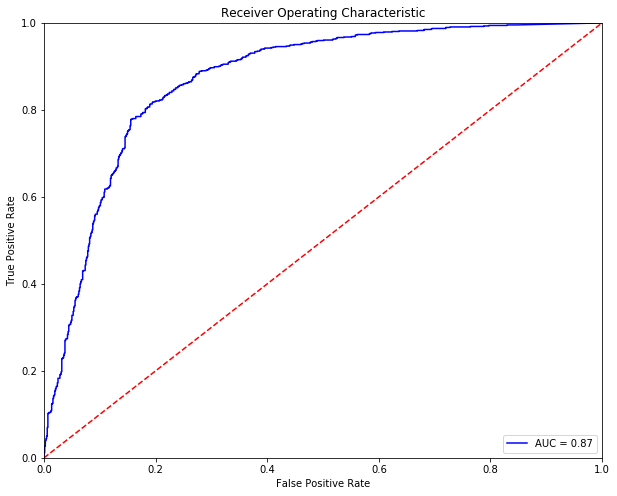

Optimal Threshold is 0.5203343283746086
Accuracy on test data is: 0.8109965635738832


Predicted  False  True  __all__
Actual                         
False        715   167      882
True         163   701      864
__all__      878   868     1746



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.5,False,True,0.5,100,multinomial,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.7881688757977418

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1644   384     2028
True         479  1567     2046
__all__     2123  1951     4074

Accuracy of the  Logistic  model for test data is: 0.8018327605956472

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        732   150      882
True         196   668      864
__all__      928   818     1746

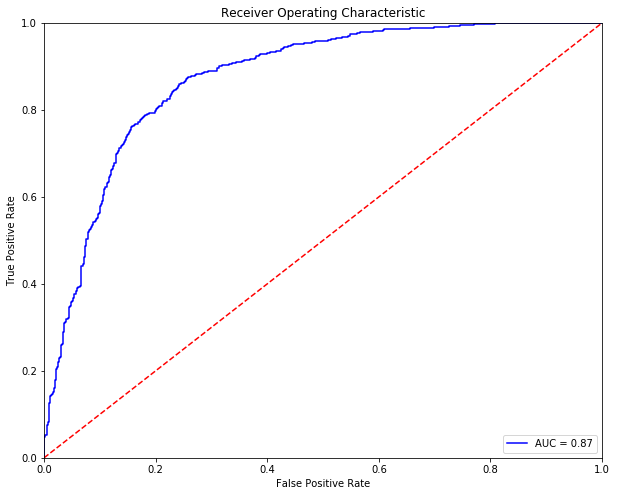

Optimal Threshold is 0.47426698790162936
Accuracy on test data is: 0.7995418098510882


Predicted  False  True  __all__
Actual                         
False        706   176      882
True         174   690      864
__all__      880   866     1746



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,200,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.7979872361315661

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1535   493     2028
True         330  1716     2046
__all__     1865  2209     4074

Accuracy of the  Random Forest Trees  model for test data is: 0.8098510882016037

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        683   199      882
True         133   731      864
__all__      816   930     1746

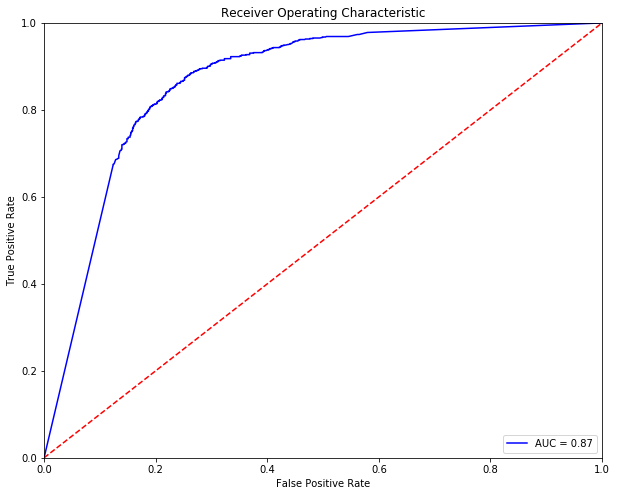

Optimal Threshold is 0.6428839674972495
Accuracy on test data is: 0.8081328751431844


Predicted  False  True  __all__
Actual                         
False        713   169      882
True         166   698      864
__all__      879   867     1746



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,1,400,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.802405498281787

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1526   502     2028
True         303  1743     2046
__all__     1829  2245     4074

Accuracy of the  AdaBoostClassifier  model for test data is: 0.806987399770905

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        667   215      882
True         122   742      864
__all__      789   957     1746

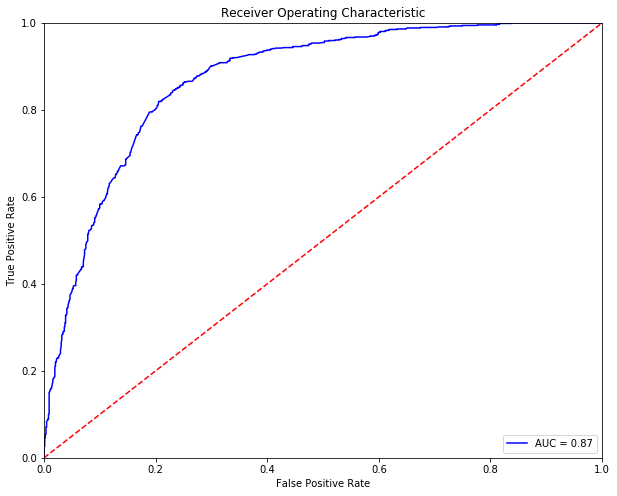

Optimal Threshold is 0.5099708240338869
Accuracy on test data is: 0.8012600229095075


Predicted  False  True  __all__
Actual                         
False        711   171      882
True         176   688      864
__all__      887   859     1746



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.1,deviance,10,0.2,50,0,0.5


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8109965635738832

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1540   488     2028
True         282  1764     2046
__all__     1822  2252     4074

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8127147766323024

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        677   205      882
True         122   742      864
__all__      799   947     1746

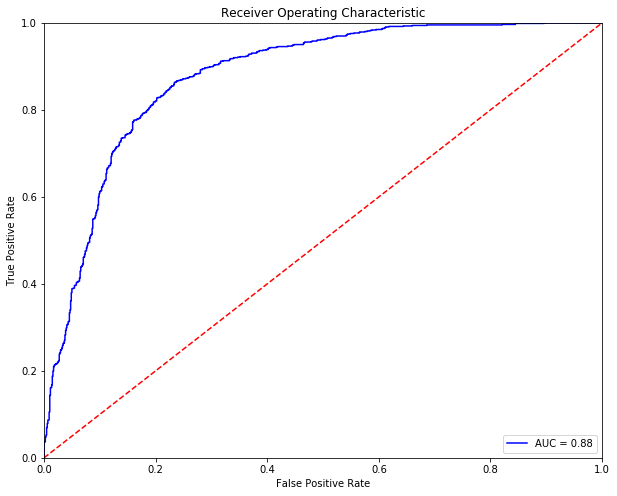

Optimal Threshold is 0.5892052711296358
Accuracy on test data is: 0.8087056128293242


Predicted  False  True  __all__
Actual                         
False        714   168      882
True         166   698      864
__all__      880   866     1746



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,entropy,10,auto,0.001,2,2,0,random


Accuracy of the  Extra Decision Tree  model for the training data is: 0.7950417280314187

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1550   478     2028
True         357  1689     2046
__all__     1907  2167     4074

Accuracy of the  Extra Decision Tree  model for test data is: 0.8127147766323024

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        703   179      882
True         148   716      864
__all__      851   895     1746

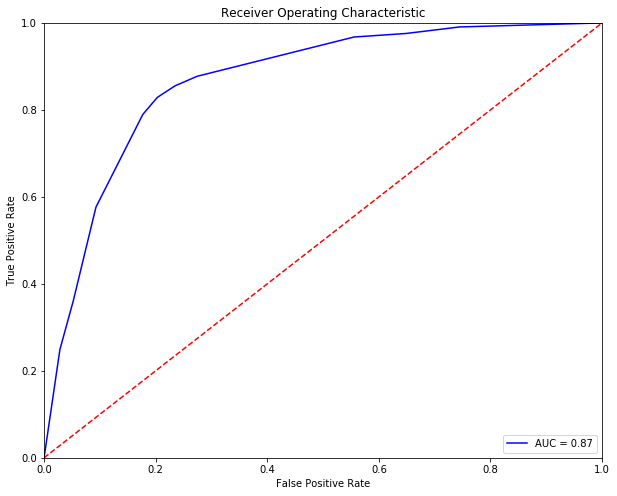

Optimal Threshold is 0.6666666666666666
Accuracy on test data is: 0.8064146620847652


Predicted  False  True  __all__
Actual                         
False        726   156      882
True         182   682      864
__all__      908   838     1746



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.4,0.3,200,True,0


Accuracy of the  Bagging  model for the training data is: 0.8924889543446245

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1735   293     2028
True         145  1901     2046
__all__     1880  2194     4074

Accuracy of the  Bagging  model for test data is: 0.8127147766323024

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        686   196      882
True         131   733      864
__all__      817   929     1746

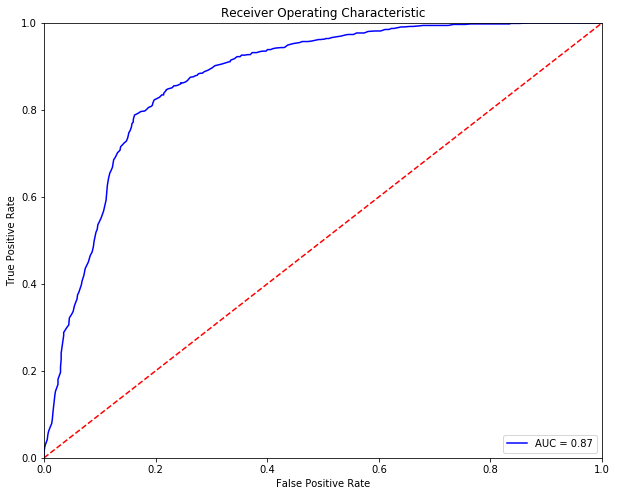

Optimal Threshold is 0.57
Accuracy on test data is: 0.8092783505154639


Predicted  False  True  __all__
Actual                         
False        717   165      882
True         168   696      864
__all__      885   861     1746



Neural Network-1
The accuracy of the model on training data is: 0.8858615610607711


Predicted  False  True  __all__
Actual                         
False       1820   208     2028
True         257  1789     2046
__all__     2077  1997     4074

The accuracy of the model on test data is: 0.7806414662084765


Predicted  False  True  __all__
Actual                         
False        705   177      882
True         206   658      864
__all__      911   835     1746

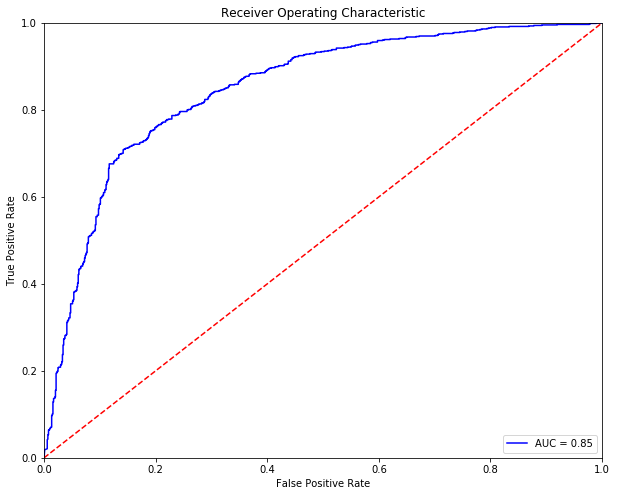

Optimal Threshold is 0.43737265
Accuracy of Logistic Model on training data is: 0.7777777777777778


Predicted  False  True  __all__
Actual                         
False        686   196      882
True         192   672      864
__all__      878   868     1746



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.7min finished


The accuracy of the model on training data is: 0.7950417280314187


Predicted  False  True  __all__
Actual                         
False       1521   507     2028
True         328  1718     2046
__all__     1849  2225     4074

The accuracy of the model on test data is: 0.8081328751431844


Predicted  False  True  __all__
Actual                         
False        676   206      882
True         129   735      864
__all__      805   941     1746

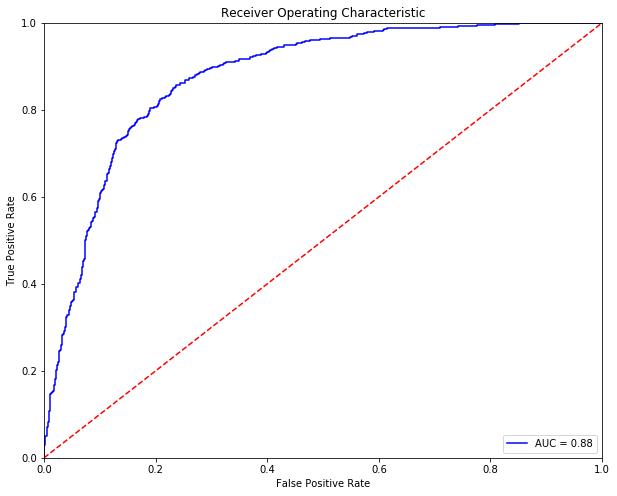

Optimal Threshold is 0.63324785
Accuracy on test data is: 0.8041237113402062


Predicted  False  True  __all__
Actual                         
False        709   173      882
True         169   695      864
__all__      878   868     1746

In [29]:
feat_imp=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_70_50_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_70_50_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_70_50_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [30]:
table_70_50_train['index']=ind_columns
table_70_50_test['index']=ind_columns
table_70_50_test_roc['index']=ind_columns

table_70_50_test.set_index(['index'],drop=True,inplace=True)
table_70_50_train.set_index(['index'],drop=True,inplace=True)
table_70_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2046.0,2028.0,0.0,0.0,0.000000,0.000000
LogisticRegression,0.788169,1567.0,1644.0,384.0,479.0,0.189349,0.234115
RandomForestClassifier,0.797987,1716.0,1535.0,493.0,330.0,0.243097,0.161290
AdaBoostClassifier,0.802405,1743.0,1526.0,502.0,303.0,0.247535,0.148094
GradientBoostingClassifier,0.810997,1764.0,1540.0,488.0,282.0,0.240631,0.137830
ExtraTreeClassifier,0.795042,1689.0,1550.0,478.0,357.0,0.235700,0.174487
BaggingClassifier,0.892489,1901.0,1735.0,293.0,145.0,0.144477,0.070870
Neural Network-1,0.885862,1789.0,1820.0,208.0,257.0,0.102564,0.125611
Neural-Network-2,0.795042,1718.0,1521.0,507.0,328.0,0.250000,0.160313


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.809851,709.0,705.0,177.0,155.0,0.200680,0.179398
LogisticRegression,0.801833,668.0,732.0,150.0,196.0,0.170068,0.226852
RandomForestClassifier,0.809851,731.0,683.0,199.0,133.0,0.225624,0.153935
AdaBoostClassifier,0.806987,742.0,667.0,215.0,122.0,0.243764,0.141204
GradientBoostingClassifier,0.812715,742.0,677.0,205.0,122.0,0.232426,0.141204
ExtraTreeClassifier,0.812715,716.0,703.0,179.0,148.0,0.202948,0.171296
BaggingClassifier,0.812715,733.0,686.0,196.0,131.0,0.222222,0.151620
Neural Network-1,0.780641,658.0,705.0,177.0,206.0,0.200680,0.238426
Neural-Network-2,0.808133,735.0,676.0,206.0,129.0,0.233560,0.149306


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.810997,701.0,715.0,167.0,163.0,0.189342,0.188657,0.520334,0.870512
LogisticRegression,0.799542,690.0,706.0,176.0,174.0,0.199546,0.201389,0.474267,0.872983
RandomForestClassifier,0.808133,698.0,713.0,169.0,166.0,0.191610,0.192130,0.642884,0.866632
AdaBoostClassifier,0.801260,688.0,711.0,171.0,176.0,0.193878,0.203704,0.509971,0.871862
GradientBoostingClassifier,0.808706,698.0,714.0,168.0,166.0,0.190476,0.192130,0.589205,0.878229
ExtraTreeClassifier,0.806415,682.0,726.0,156.0,182.0,0.176871,0.210648,0.666667,0.867768
BaggingClassifier,0.809278,696.0,717.0,165.0,168.0,0.187075,0.194444,0.570000,0.872861
Neural Network-1,0.777778,672.0,686.0,196.0,192.0,0.222222,0.222222,0.437373,0.848235
Neural-Network-2,0.804124,695.0,709.0,173.0,169.0,0.196145,0.195602,0.633248,0.875373


#### Random State 10

In [31]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_10.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

## Table to store training and test measures
table_70_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847,4555,135,61,234,1180,5030,132.304771,73.091252,117.687475,16211.290656,162537.369185,505,537,405,191,123,63,55,31,60,58,68,140,306,137,125,191,109,234,264,244,361,205,399,219
910f8814c078483a86a1030fa3fce449aaeafd169b144fb3131f4c1577252cc3,9874,59,59,112,2319,11943,72.815373,68.967847,53.259315,33132.043708,73635.531525,226,124,250,322,544,1307,803,855,806,600,729,512,249,247,321,471,643,417,561,406,539,466,373,172


1 -> Infected
0 -> Uninfected


User
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847    1
910f8814c078483a86a1030fa3fce449aaeafd169b144fb3131f4c1577252cc3    1
117f95f1e1e2f68a2fcbb99523c4d6b2cd4307a559b566c799ea644cefadcf3b    0
4d648f5609b96f24133ff4ca6473d1bc6ae1e4d8723701c182c856b3eb4abebb    1
d225251f106c00909acb89ddc8766a8221b31e5d48cf3cd0d1dbbb877c47e30a    1
Name: Target, dtype: int64

The train/test split ratio is 70:30


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,30,uniform


Accuracy of the  KNN  model for the training data is: 0.8080510554737359

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1580   433     2013
True         349  1712     2061
__all__     1929  2145     4074

Accuracy of the  KNN  model for test data is: 0.7961053837342497

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        713   184      897
True         172   677      849
__all__      885   861     1746

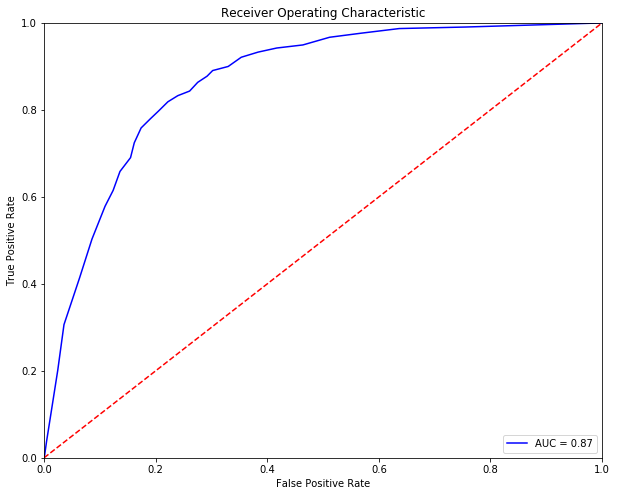

Optimal Threshold is 0.5333333333333333
Accuracy on test data is: 0.7949599083619702


Predicted  False  True  __all__
Actual                         
False        726   171      897
True         187   662      849
__all__      913   833     1746



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.7,False,True,0.7,50,multinomial,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.7982326951399117

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1631   382     2013
True         440  1621     2061
__all__     2071  2003     4074

Accuracy of the  Logistic  model for test data is: 0.7892325315005727

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        739   158      897
True         210   639      849
__all__      949   797     1746

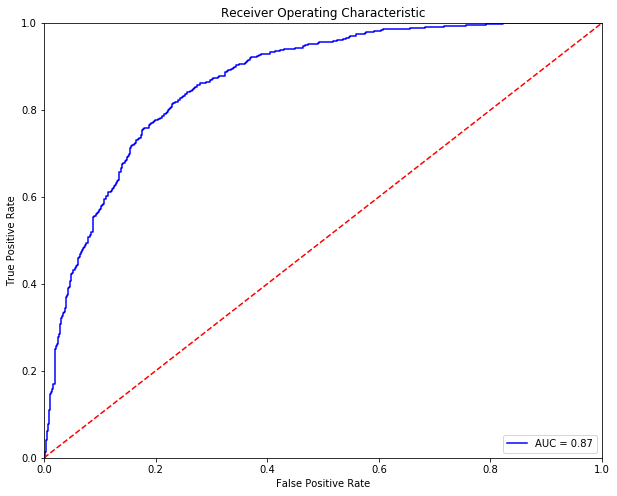

Optimal Threshold is 0.46984438108698845
Accuracy on test data is: 0.7869415807560137


Predicted  False  True  __all__
Actual                         
False        706   191      897
True         181   668      849
__all__      887   859     1746



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,300,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.8065783014236623

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1553   460     2013
True         328  1733     2061
__all__     1881  2193     4074

Accuracy of the  Random Forest Trees  model for test data is: 0.7938144329896907

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        699   198      897
True         162   687      849
__all__      861   885     1746

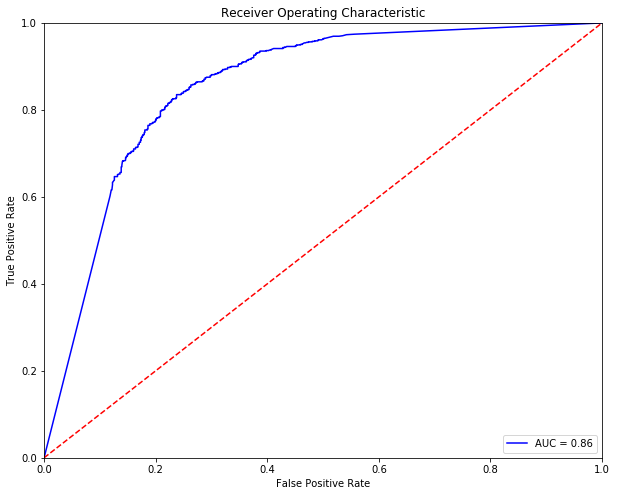

Optimal Threshold is 0.5490085019635139
Accuracy on test data is: 0.7938144329896907


Predicted  False  True  __all__
Actual                         
False        710   187      897
True         173   676      849
__all__      883   863     1746



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,1,400,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8060873834069711

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1543   470     2013
True         320  1741     2061
__all__     1863  2211     4074

Accuracy of the  AdaBoostClassifier  model for test data is: 0.7938144329896907

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        695   202      897
True         158   691      849
__all__      853   893     1746

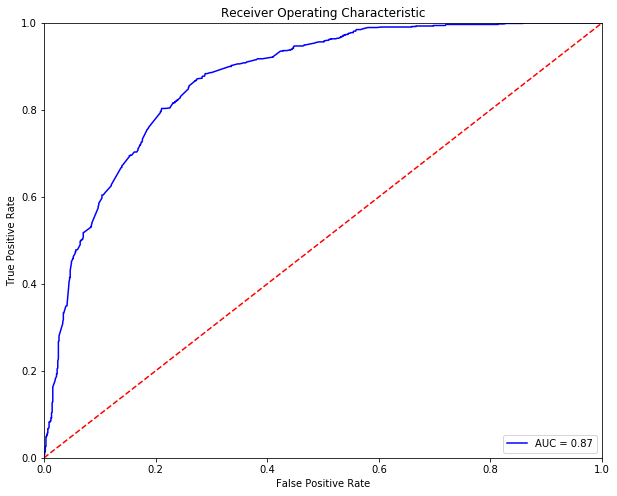

Optimal Threshold is 0.511780150763068
Accuracy on test data is: 0.7869415807560137


Predicted  False  True  __all__
Actual                         
False        729   168      897
True         204   645      849
__all__      933   813     1746



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.03,deviance,5,0.3,100,0,0.5


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8087874324987727

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1545   468     2013
True         311  1750     2061
__all__     1856  2218     4074

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.7961053837342497

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        692   205      897
True         151   698      849
__all__      843   903     1746

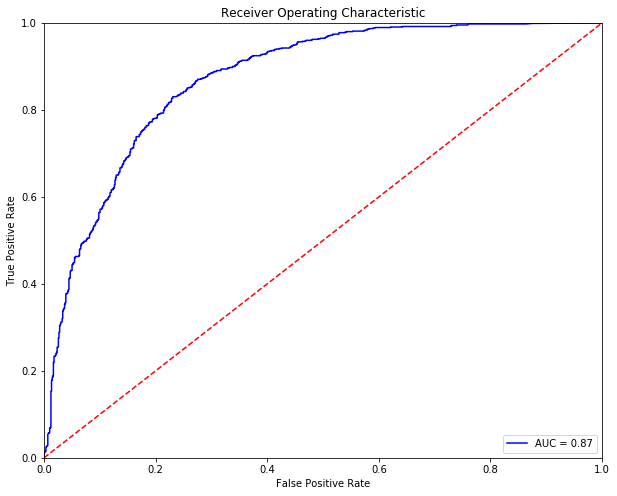

Optimal Threshold is 0.5529217809200557
Accuracy on test data is: 0.7915234822451317


Predicted  False  True  __all__
Actual                         
False        710   187      897
True         177   672      849
__all__      887   859     1746



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,entropy,10,auto,0.1,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8009327442317133

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1502   511     2013
True         300  1761     2061
__all__     1802  2272     4074

Accuracy of the  Extra Decision Tree  model for test data is: 0.788659793814433

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        678   219      897
True         150   699      849
__all__      828   918     1746

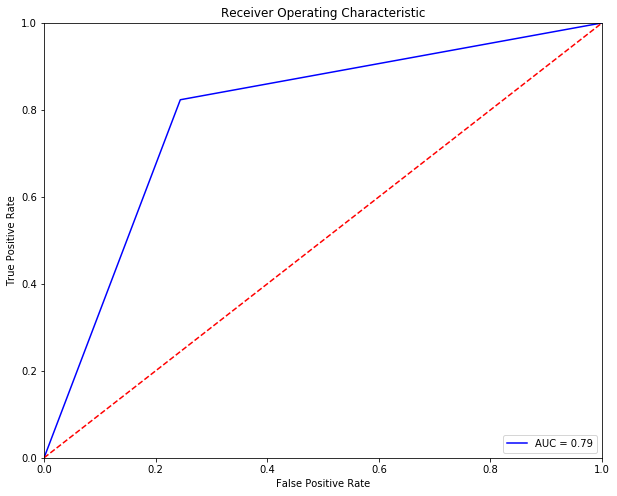

Optimal Threshold is 0.7750880281690141
Accuracy on test data is: 0.5137457044673539


Predicted   0.0  1.0  __all__
Actual                       
0.0         897    0      897
1.0         849    0      849
__all__    1746    0     1746

897
0
0
897
849
0
0
849
1.0
0.0
0.0
1.0


Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.6,0.4,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.9216985763377515

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1792   221     2013
True          98  1963     2061
__all__     1890  2184     4074

Accuracy of the  Bagging  model for test data is: 0.7926689576174112

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        694   203      897
True         159   690      849
__all__      853   893     1746

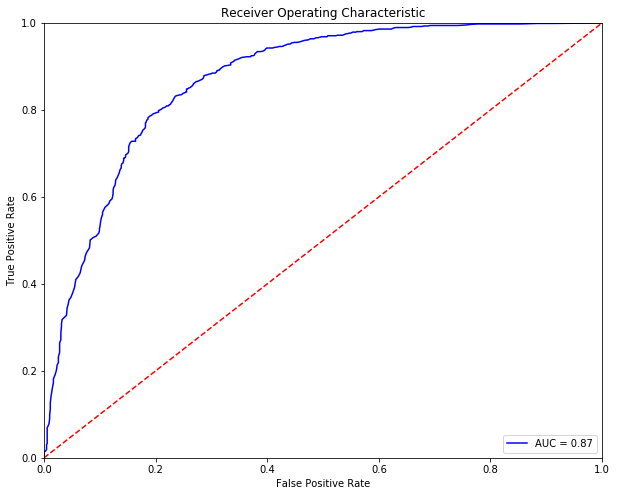

Optimal Threshold is 0.5366666666666666
Accuracy on test data is: 0.7961053837342497


Predicted  False  True  __all__
Actual                         
False        716   181      897
True         175   674      849
__all__      891   855     1746



Neural Network-1
The accuracy of the model on training data is: 0.8780068729107556


Predicted  False  True  __all__
Actual                         
False       1794   219     2013
True         278  1783     2061
__all__     2072  2002     4074

The accuracy of the model on test data is: 0.7760595647193586


Predicted  False  True  __all__
Actual                         
False        717   180      897
True         211   638      849
__all__      928   818     1746

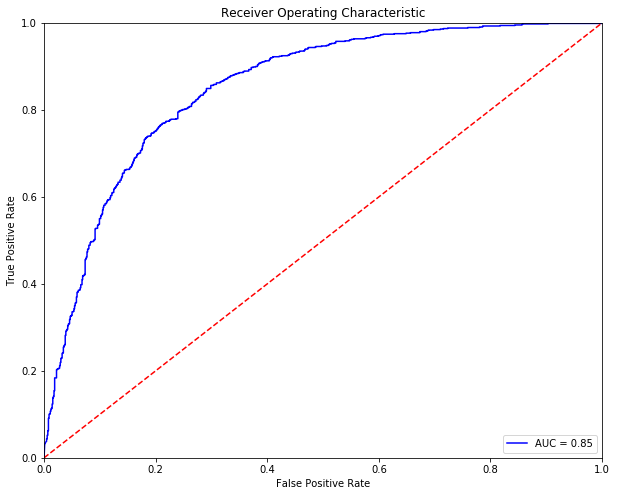

Optimal Threshold is 0.44575664
Accuracy of Logistic Model on training data is: 0.7754868270332188


Predicted  False  True  __all__
Actual                         
False        696   201      897
True         191   658      849
__all__      887   859     1746



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.4min finished


The accuracy of the model on training data is: 0.7984781541482573


Predicted  False  True  __all__
Actual                         
False       1468   545     2013
True         276  1785     2061
__all__     1744  2330     4074

The accuracy of the model on test data is: 0.7915234822451317


Predicted  False  True  __all__
Actual                         
False        667   230      897
True         134   715      849
__all__      801   945     1746

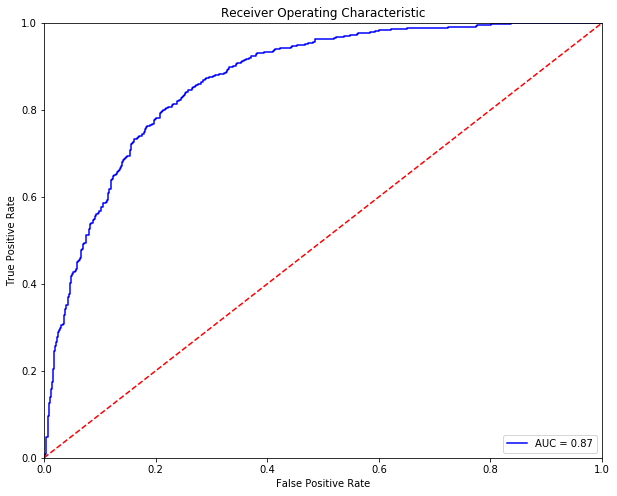

Optimal Threshold is 0.60290664
Accuracy on test data is: 0.7915234822451317


Predicted  False  True  __all__
Actual                         
False        710   187      897
True         177   672      849
__all__      887   859     1746

In [32]:
feat_imp_10=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_10[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_70_50_10_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_70_50_10_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_70_50_10_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [33]:
table_70_50_10_train['index']=ind_columns
table_70_50_10_test['index']=ind_columns
table_70_50_10_test_roc['index']=ind_columns

table_70_50_10_test.set_index(['index'],drop=True,inplace=True)
table_70_50_10_train.set_index(['index'],drop=True,inplace=True)
table_70_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2046.0,2028.0,0.0,0.0,0.000000,0.000000
LogisticRegression,0.788169,1567.0,1644.0,384.0,479.0,0.189349,0.234115
RandomForestClassifier,0.797987,1716.0,1535.0,493.0,330.0,0.243097,0.161290
AdaBoostClassifier,0.802405,1743.0,1526.0,502.0,303.0,0.247535,0.148094
GradientBoostingClassifier,0.810997,1764.0,1540.0,488.0,282.0,0.240631,0.137830
ExtraTreeClassifier,0.795042,1689.0,1550.0,478.0,357.0,0.235700,0.174487
BaggingClassifier,0.892489,1901.0,1735.0,293.0,145.0,0.144477,0.070870
Neural Network-1,0.885862,1789.0,1820.0,208.0,257.0,0.102564,0.125611
Neural-Network-2,0.795042,1718.0,1521.0,507.0,328.0,0.250000,0.160313


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.809851,709.0,705.0,177.0,155.0,0.200680,0.179398
LogisticRegression,0.801833,668.0,732.0,150.0,196.0,0.170068,0.226852
RandomForestClassifier,0.809851,731.0,683.0,199.0,133.0,0.225624,0.153935
AdaBoostClassifier,0.806987,742.0,667.0,215.0,122.0,0.243764,0.141204
GradientBoostingClassifier,0.812715,742.0,677.0,205.0,122.0,0.232426,0.141204
ExtraTreeClassifier,0.812715,716.0,703.0,179.0,148.0,0.202948,0.171296
BaggingClassifier,0.812715,733.0,686.0,196.0,131.0,0.222222,0.151620
Neural Network-1,0.780641,658.0,705.0,177.0,206.0,0.200680,0.238426
Neural-Network-2,0.808133,735.0,676.0,206.0,129.0,0.233560,0.149306


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.810997,701.0,715.0,167.0,163.0,0.189342,0.188657,0.520334,0.870512
LogisticRegression,0.799542,690.0,706.0,176.0,174.0,0.199546,0.201389,0.474267,0.872983
RandomForestClassifier,0.808133,698.0,713.0,169.0,166.0,0.191610,0.192130,0.642884,0.866632
AdaBoostClassifier,0.801260,688.0,711.0,171.0,176.0,0.193878,0.203704,0.509971,0.871862
GradientBoostingClassifier,0.808706,698.0,714.0,168.0,166.0,0.190476,0.192130,0.589205,0.878229
ExtraTreeClassifier,0.806415,682.0,726.0,156.0,182.0,0.176871,0.210648,0.666667,0.867768
BaggingClassifier,0.809278,696.0,717.0,165.0,168.0,0.187075,0.194444,0.570000,0.872861
Neural Network-1,0.777778,672.0,686.0,196.0,192.0,0.222222,0.222222,0.437373,0.848235
Neural-Network-2,0.804124,695.0,709.0,173.0,169.0,0.196145,0.195602,0.633248,0.875373


#### Random State 20

In [34]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_20.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

## Table to store training and test measures
table_70_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec429a3f1a997c5ba98,994,23,34,106,305,1011,280.252226,164.641939,83.002967,13987.476756,359758.589515,0,0,0,0,0,0,0,0,1,2,58,80,103,68,62,111,155,226,100,12,15,6,8,4
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9e976b79fa3511fa48,38,6,6,6,15,38,12.368421,10.394737,48.078947,1728.315789,9966.815789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,15,13,0,0,0,0,0,0,0


1 -> Infected
0 -> Uninfected


User
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec429a3f1a997c5ba98    0
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9e976b79fa3511fa48    0
a70d401cfd6804c5711ae7620658b6be8b25483f999cb8bf73e44e011f877dd9    1
22730c54b8e7377fdfa932bf6b6c14741966f73ac8cc7d945fae9264c808afbb    0
47d304146c958a1134c7c928152e25972e4b8e660576183ae7dbca7d7db049db    1
Name: Target, dtype: int64

The train/test split ratio is 70:30


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,30,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2065     0     2065
True           0  2009     2009
__all__     2065  2009     4074

Accuracy of the  KNN  model for test data is: 0.8018327605956472

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        676   169      845
True         177   724      901
__all__      853   893     1746

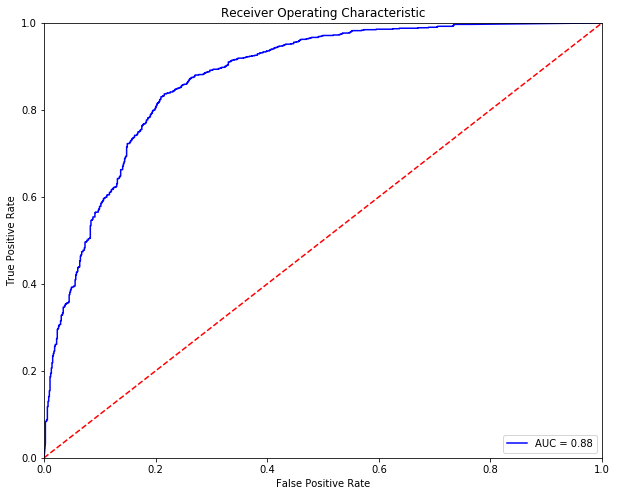

Optimal Threshold is 0.5042266358279812
Accuracy on test data is: 0.8012600229095075


Predicted  False  True  __all__
Actual                         
False        678   167      845
True         180   721      901
__all__      858   888     1746



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.5,False,True,0.5,100,multinomial,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.7874324987727049

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1668   397     2065
True         469  1540     2009
__all__     2137  1937     4074

Accuracy of the  Logistic  model for test data is: 0.7869415807560137

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        706   139      845
True         233   668      901
__all__      939   807     1746

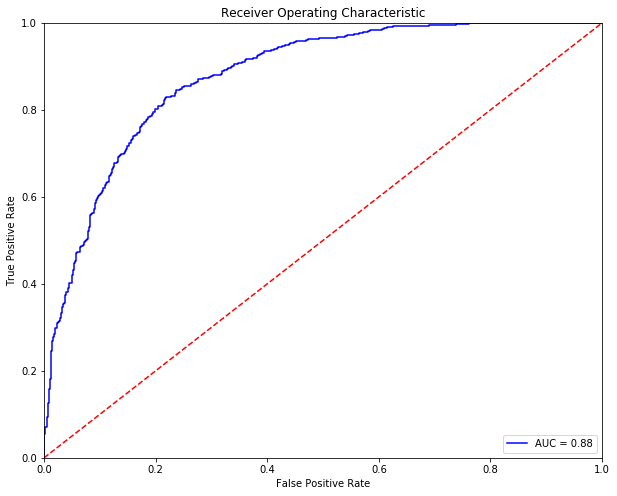

Optimal Threshold is 0.45473757413937993
Accuracy on test data is: 0.8012600229095075


Predicted  False  True  __all__
Actual                         
False        677   168      845
True         179   722      901
__all__      856   890     1746



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,entropy,10,auto,10,0.1,10,10,0.1,300,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.8021600392734414

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1568   497     2065
True         309  1700     2009
__all__     1877  2197     4074

Accuracy of the  Random Forest Trees  model for test data is: 0.8064146620847652

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        673   172      845
True         166   735      901
__all__      839   907     1746

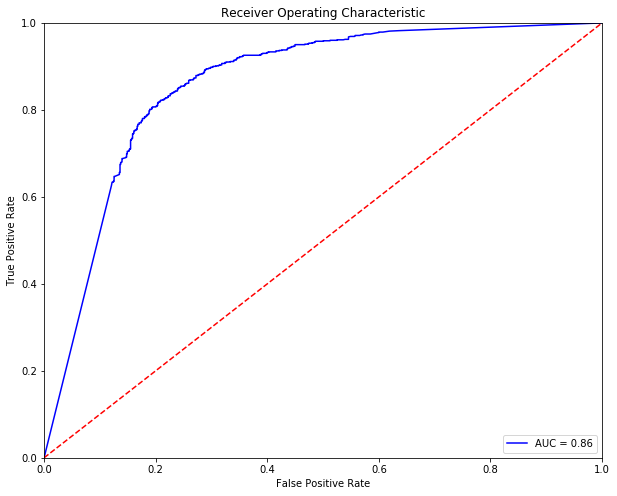

Optimal Threshold is 0.5387872025008884
Accuracy on test data is: 0.8058419243986255


Predicted  False  True  __all__
Actual                         
False        681   164      845
True         175   726      901
__all__      856   890     1746



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,1,400,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8009327442317133

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1560   505     2065
True         306  1703     2009
__all__     1866  2208     4074

Accuracy of the  AdaBoostClassifier  model for test data is: 0.797823596792669

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        661   184      845
True         169   732      901
__all__      830   916     1746

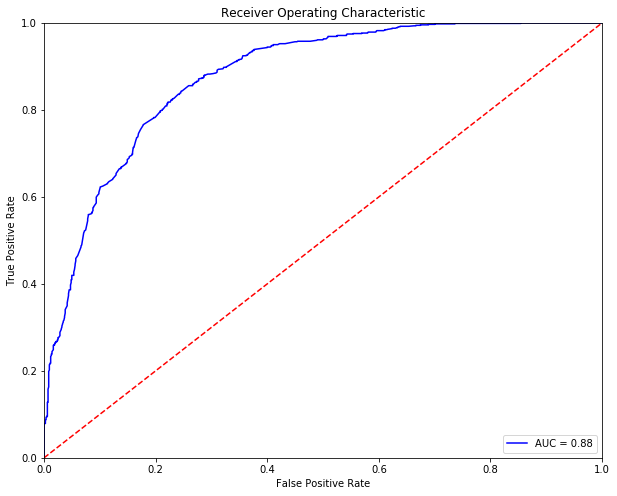

Optimal Threshold is 0.5104244609753609
Accuracy on test data is: 0.7915234822451317


Predicted  False  True  __all__
Actual                         
False        677   168      845
True         196   705      901
__all__      873   873     1746



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.2,deviance,5,0.2,50,0,0.7


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8267059401080019

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1636   429     2065
True         277  1732     2009
__all__     1913  2161     4074

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8029782359679267

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        661   184      845
True         160   741      901
__all__      821   925     1746

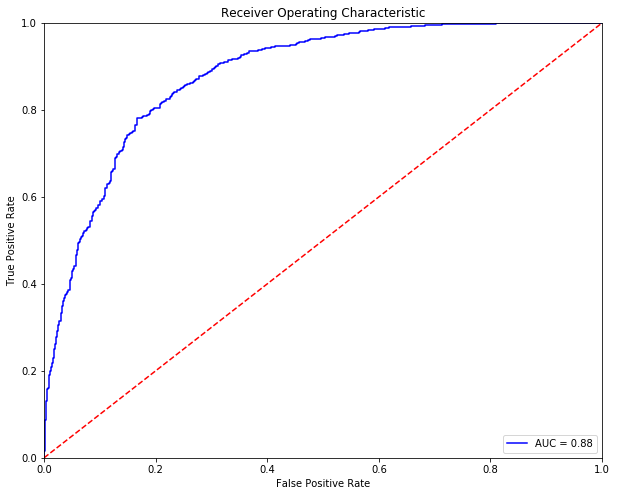

Optimal Threshold is 0.5407121792226216
Accuracy on test data is: 0.802405498281787


Predicted  False  True  __all__
Actual                         
False        679   166      845
True         179   722      901
__all__      858   888     1746



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8058419243986255

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1495   570     2065
True         221  1788     2009
__all__     1716  2358     4074

Accuracy of the  Extra Decision Tree  model for test data is: 0.7949599083619702

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        618   227      845
True         131   770      901
__all__      749   997     1746

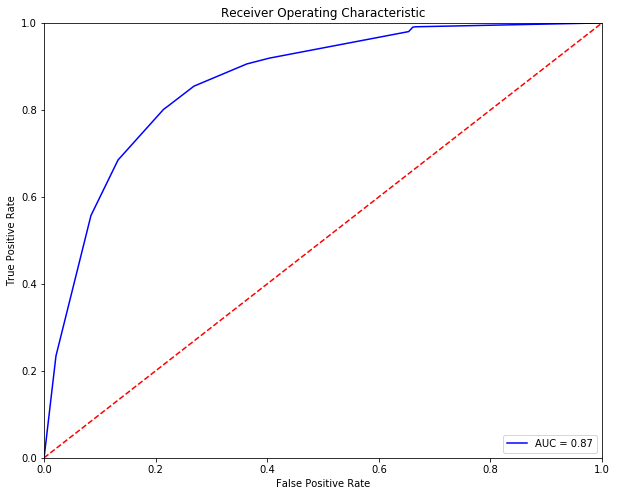

Optimal Threshold is 0.5862068965517241
Accuracy on test data is: 0.7731958762886598


Predicted  False  True  __all__
Actual                         
False        733   112      845
True         284   617      901
__all__     1017   729     1746



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.6,0.4,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.9290623465881198

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1885   180     2065
True         109  1900     2009
__all__     1994  2080     4074

Accuracy of the  Bagging  model for test data is: 0.8052691867124857

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        666   179      845
True         161   740      901
__all__      827   919     1746

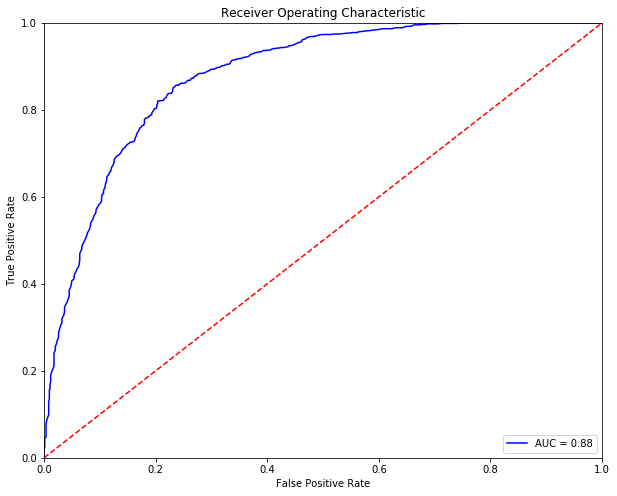

Optimal Threshold is 0.54
Accuracy on test data is: 0.8012600229095075


Predicted  False  True  __all__
Actual                         
False        679   166      845
True         181   720      901
__all__      860   886     1746



Neural Network-1
The accuracy of the model on training data is: 0.8875797741191903


Predicted  False  True  __all__
Actual                         
False       1948   117     2065
True         341  1668     2009
__all__     2289  1785     4074

The accuracy of the model on test data is: 0.7537227949599083


Predicted  False  True  __all__
Actual                         
False        704   141      845
True         289   612      901
__all__      993   753     1746

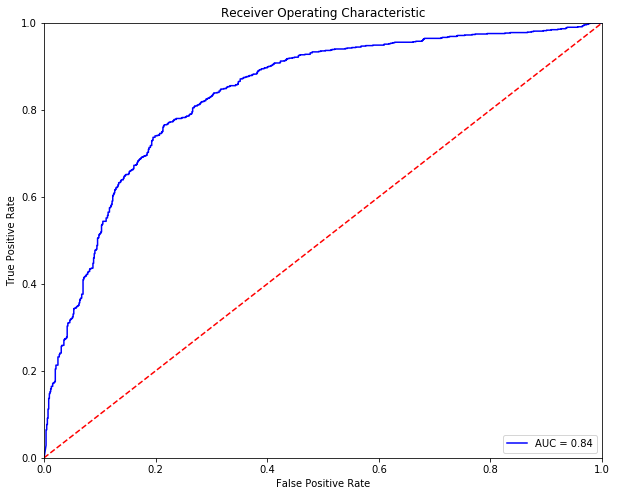

Optimal Threshold is 0.33881307
Accuracy of Logistic Model on training data is: 0.7726231386025201


Predicted  False  True  __all__
Actual                         
False        654   191      845
True         206   695      901
__all__      860   886     1746



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.0min finished


The accuracy of the model on training data is: 0.7940598919980363


Predicted  False  True  __all__
Actual                         
False       1555   510     2065
True         329  1680     2009
__all__     1884  2190     4074

The accuracy of the model on test data is: 0.7989690721649485


Predicted  False  True  __all__
Actual                         
False        664   181      845
True         170   731      901
__all__      834   912     1746

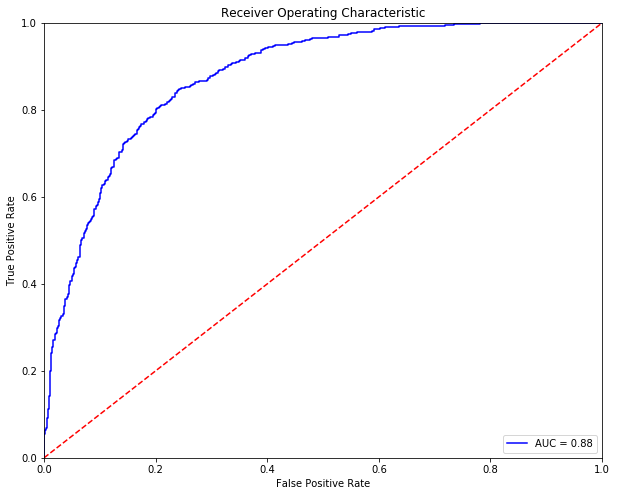

Optimal Threshold is 0.54634875
Accuracy on test data is: 0.8006872852233677


Predicted  False  True  __all__
Actual                         
False        676   169      845
True         179   722      901
__all__      855   891     1746

In [35]:
feat_imp_20=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_20[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_70_50_20_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_70_50_20_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_70_50_20_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [36]:
table_70_50_20_train['index']=ind_columns
table_70_50_20_test['index']=ind_columns
table_70_50_20_test_roc['index']=ind_columns

table_70_50_20_test.set_index(['index'],drop=True,inplace=True)
table_70_50_20_train.set_index(['index'],drop=True,inplace=True)
table_70_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_20_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2009.0,2065.0,0.0,0.0,0.000000,0.000000
LogisticRegression,0.787432,1540.0,1668.0,397.0,469.0,0.192252,0.233449
RandomForestClassifier,0.802160,1700.0,1568.0,497.0,309.0,0.240678,0.153808
AdaBoostClassifier,0.800933,1703.0,1560.0,505.0,306.0,0.244552,0.152315
GradientBoostingClassifier,0.826706,1732.0,1636.0,429.0,277.0,0.207748,0.137880
ExtraTreeClassifier,0.805842,1788.0,1495.0,570.0,221.0,0.276029,0.110005
BaggingClassifier,0.929062,1900.0,1885.0,180.0,109.0,0.087167,0.054256
Neural Network-1,0.887580,1668.0,1948.0,117.0,341.0,0.056659,0.169736
Neural-Network-2,0.794060,1680.0,1555.0,510.0,329.0,0.246973,0.163763


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.801833,724.0,676.0,169.0,177.0,0.200000,0.196448
LogisticRegression,0.786942,668.0,706.0,139.0,233.0,0.164497,0.258602
RandomForestClassifier,0.806415,735.0,673.0,172.0,166.0,0.203550,0.184240
AdaBoostClassifier,0.797824,732.0,661.0,184.0,169.0,0.217751,0.187569
GradientBoostingClassifier,0.802978,741.0,661.0,184.0,160.0,0.217751,0.177580
ExtraTreeClassifier,0.794960,770.0,618.0,227.0,131.0,0.268639,0.145394
BaggingClassifier,0.805269,740.0,666.0,179.0,161.0,0.211834,0.178690
Neural Network-1,0.753723,612.0,704.0,141.0,289.0,0.166864,0.320755
Neural-Network-2,0.798969,731.0,664.0,181.0,170.0,0.214201,0.188679


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.801260,721.0,678.0,167.0,180.0,0.197633,0.199778,0.504227,0.875686
LogisticRegression,0.801260,722.0,677.0,168.0,179.0,0.198817,0.198668,0.454738,0.877672
RandomForestClassifier,0.805842,726.0,681.0,164.0,175.0,0.194083,0.194229,0.538787,0.860374
AdaBoostClassifier,0.791523,705.0,677.0,168.0,196.0,0.198817,0.217536,0.510424,0.876870
GradientBoostingClassifier,0.802405,722.0,679.0,166.0,179.0,0.196450,0.198668,0.540712,0.880586
ExtraTreeClassifier,0.773196,617.0,733.0,112.0,284.0,0.132544,0.315205,0.586207,0.865418
BaggingClassifier,0.801260,720.0,679.0,166.0,181.0,0.196450,0.200888,0.540000,0.879147
Neural Network-1,0.772623,695.0,654.0,191.0,206.0,0.226036,0.228635,0.338813,0.836383
Neural-Network-2,0.800687,722.0,676.0,169.0,179.0,0.200000,0.198668,0.546349,0.878196


In [37]:
table_70_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

table_70_50_train_avg['accuracy']=(table_70_50_train['accuracy']+table_70_50_10_train['accuracy']+table_70_50_20_train['accuracy'])/3.0
table_70_50_train_avg['FPR']=(table_70_50_train['FPR']+table_70_50_10_train['FPR']+table_70_50_20_train['FPR'])/3.0
table_70_50_train_avg['FNR']=(table_70_50_train['FNR']+table_70_50_10_train['FNR']+table_70_50_20_train['FNR'])/3.0

table_70_50_test_avg['accuracy']=(table_70_50_test['accuracy']+table_70_50_10_test['accuracy']+table_70_50_20_test['accuracy'])/3.0
table_70_50_test_avg['FPR']=(table_70_50_test['FPR']+table_70_50_10_test['FPR']+table_70_50_20_test['FPR'])/3.0
table_70_50_test_avg['FNR']=(table_70_50_test['FNR']+table_70_50_10_test['FNR']+table_70_50_20_test['FNR'])/3.0

table_70_50_test_roc_avg['accuracy']=(table_70_50_test_roc['accuracy']+table_70_50_10_test_roc['accuracy']+table_70_50_20_test_roc['accuracy'])/3.0
table_70_50_test_roc_avg['FPR']=(table_70_50_test_roc['FPR']+table_70_50_10_test_roc['FPR']+table_70_50_20_test_roc['FPR'])/3.0
table_70_50_test_roc_avg['FNR']=(table_70_50_test_roc['FNR']+table_70_50_10_test_roc['FNR']+table_70_50_20_test_roc['FNR'])/3.0
table_70_50_test_roc_avg['auc']=(table_70_50_test_roc['auc']+table_70_50_10_test_roc['auc']+table_70_50_20_test_roc['auc'])/3.0


print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_70_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc_avg)

feat_imp_70_50=list(map(sum, zip(feat_imp,feat_imp_10,feat_imp_20)))
print("Average feature imortance for the 3 random sets:")
feat_impt_plot(sum(feat_imp_70_50)/12)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,0.936017,0.071701,0.056445
LogisticRegression,0.791278,0.190456,0.227018
RandomForestClassifier,0.802242,0.237430,0.158081
AdaBoostClassifier,0.803142,0.241856,0.151891
GradientBoostingClassifier,0.815497,0.226956,0.142202
ExtraTreeClassifier,0.800605,0.255193,0.143351
BaggingClassifier,0.914417,0.113810,0.057559
Neural Network-1,0.883816,0.089339,0.143411
Neural-Network-2,0.795860,0.255905,0.152664


Comparision Table for Test Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,0.802596,0.201936,0.192813
LogisticRegression,0.792669,0.170236,0.244268
RandomForestClassifier,0.803360,0.216637,0.176329
AdaBoostClassifier,0.799542,0.228904,0.171625
GradientBoostingClassifier,0.803933,0.226239,0.165547
ExtraTreeClassifier,0.798778,0.238578,0.164456
BaggingClassifier,0.803551,0.220122,0.172530
Neural Network-1,0.770141,0.189404,0.269236
Neural-Network-2,0.799542,0.234724,0.165273


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,FPR,FNR,auc
index,,,,
KNeighborsClassifier,0.802405,0.192537,0.202898,0.870747
LogisticRegression,0.795914,0.203765,0.204416,0.872716
RandomForestClassifier,0.802596,0.198055,0.196709,0.860731
AdaBoostClassifier,0.793242,0.193328,0.220507,0.873105
GradientBoostingClassifier,0.800878,0.198466,0.199759,0.876898
ExtraTreeClassifier,0.697785,0.274387,0.337369,0.840924
BaggingClassifier,0.802215,0.195103,0.200486,0.873905
Neural Network-1,0.775296,0.224113,0.225276,0.845422
Neural-Network-2,0.798778,0.201539,0.200917,0.874347


Average feature imortance for the 3 random sets:


In [2]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')